# Credit Default Risk Prediction
# Part 1. Plan and Exploratory Data Analysis

**Table of Contents**<a id='toc0_'></a>    
- 1. [Introduction and Project Plan               ](#toc1_)    
- 2. [Notebook Preparation               ](#toc2_)    
- 3. [Exploratory Data Analysis               ](#toc3_)    
  - 3.1. [Main Home Credit Applications            ](#toc3_1_)    
    - 3.1.1. [Data Preparation               ](#toc3_1_1_)    
    - 3.1.2. [Statistical Inference and $\phi_K$ Correlation               ](#toc3_1_2_)    
    - 3.1.3. [Visual Analysis of Selected Features               ](#toc3_1_3_)    
    - 3.1.4. [Summary of Analysis of Main Home Credit Applications              ](#toc3_1_4_)    
  - 3.2. [Previous Credits from Other Institutions               ](#toc3_2_)    
    - 3.2.1. [Data Preparation and Basic Analysis       ](#toc3_2_1_)    
    - 3.2.2. [Statistical Inference and $\phi_K$ Correlation       ](#toc3_2_2_)    
    - 3.2.3. [Visual Analysis of Selected Features       ](#toc3_2_3_)    
    - 3.2.4. [Summary of Analysis of Previous Credits from Other Institutions        ](#toc3_2_4_)    
  - 3.3. [Balance of Previous Credits from Other Institutions               ](#toc3_3_)    
    - 3.3.1. [Data Preparation    ](#toc3_3_1_)    
    - 3.3.2. [Analysis of the Latest Month Balance    ](#toc3_3_2_)    
    - 3.3.3. [Summary of Analysis of Balance of Previous Credits from Other Institutions    ](#toc3_3_3_)    
  - 3.4. [Previous Applications for Home Credit Loans             ](#toc3_4_)    
    - 3.4.1. [Data Preparation and Basic Analysis   ](#toc3_4_1_)    
    - 3.4.2. [Statistical Inference and $\phi_K$ Correlation   ](#toc3_4_2_)    
    - 3.4.3. [Visual Analysis of Selected Features   ](#toc3_4_3_)    
    - 3.4.4. [Summary of Analysis of Previous Applications for Home Credit Loans   ](#toc3_4_4_)    
  - 3.5. [Balance of Previous Point of Sales and Cash Loans from Home Credit               ](#toc3_5_)    
    - 3.5.1. [Data Preparation and Basic Insights ](#toc3_5_1_)    
    - 3.5.2. [Analysis of the Latest Month Balance ](#toc3_5_2_)    
    - 3.5.3. [Summary of Analysis of Balance of Previous Point of Sales and Cash Loans from Home Credit ](#toc3_5_3_)    
  - 3.6. [Balance of Previous Credit Cards from Home Credit               ](#toc3_6_)    
    - 3.6.1. [Data Preparation and Basic Insights ](#toc3_6_1_)    
    - 3.6.2. [Analysis of the Latest Month Balance ](#toc3_6_2_)    
    - 3.6.3. [Summary of Analysis of Balance of Previous Credit Cards from Home Credit ](#toc3_6_3_)    
  - 3.7. [Installments on Previous Loans from Home Credit               ](#toc3_7_)    
    - 3.7.1. [Data Preparation and Basic Insights ](#toc3_7_1_)    
    - 3.7.2. [Analysis of the Latest Installments ](#toc3_7_2_)    
    - 3.7.3. [Summary of Analysis of Installments on Previous Loans from Home Credit ](#toc3_7_3_)    
  - 3.8. [Insights from Exploratory Data Analysis ](#toc3_8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Note that the links in the above table of contents do not work on GitHub or Google Colab. In Google Colab, please use its embedded table of contents.

## 1. <a id='toc1_'></a>Introduction and Project Plan                [&#8593;](#toc0_)

The **ultimate goal** of this project is to build a machine learning (ML) model to provide default risk evaluation as a service for retail banks. A plan to achieve this goal is as follows:

1. **Framing the Problem:** The goal of the business is to distinguish possible defaulters and non-defaulters as accurately as possible. Both classes are important: defaulters need to be accurately identified, however, ensuring that clients capable of repayment are not rejected is crucial. It is preferable that the default evaluation model not only predicts the class but also provides the probability so that the final decision can be made by the expert. Since we care about both classes equally, the Area Under the ROC Curve, or **ROC AUC score**, is used as the ML metric to evaluate how good the model is at ranking predictions. This is a threshold-agnostic metric, which allows setting a **threshold based on business needs**. Hence, a business metric of **total gain** is tried to be maximized by setting an appropriate classification threshold. With available data containing labels, this problem can be deemed as supervised. Naturally, the final model can be gradually improved/updated as more information about loan repayment comes in. A similar problem has been solved with a ROC AUC slightly above 0.80 using sophisticated model stacking and feature engineering. It is preferable to build a model that is less computationally expensive and easier to interpret; hence, some decrease in performance metric can be tolerated. Any expertise from the credit scoring field is valuable in developing an ML model for default risk evaluation.

2. **Data:** A dataset from [Home Credit Group](https://www.homecredit.net/) is used to build a proof-of-concept (POC) product. Home Credit strives to broaden financial inclusion for the unbanked population. In order to ensure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

3. **Exploratory Data Analysis:** This step is essential to understand the data at hand. Columns in the tables are analyzed in terms of their meaning, data type, missing values, usefulness for the task, possible outliers, distribution, and value range. Correlations between columns and especially univariate correlations between columns and the target are checked. This way multicollinearity and columns useful for target prediction can be identified. Exploratory data analysis also helps in coming up with promising transformations to apply to columns. Possible domain knowledge should also be utilized.

4. **Data Preparation:** Raw values in columns may lack predictive power, and hence, the data can be transformed to better expose the underlying patterns to ML algorithms. This step includes treating outliers and missing values, as well as dropping columns not useful for the task. The most important part of this step is feature engineering where features may be decomposed, transformed, or aggregated. As a final step, feature scaling might be applied.

5. **Model Selection:** At this step, models with different architectures using standard parameters are trained and compared to shortlist the most promising ones. 

6. **Fine-Tuning:** Hyperparameters of the selected algorithms should be tuned to reach the highest potential of the solution. Here, a Bayesian optimization approach might help to come to the optimum hyperparameter choices more quickly. After fine-tuning, the model's performance on the test set is measured to estimate the generalization error.

7. **Presenting the Solution:** All the steps of the project plan should be clearly outlined. They will be presented in the notebooks with insights from each step leading to instructions for the next steps.

8. **Model Deployment:** The final solution will be deployed to the Google Cloud Platform using Gradio interface.

## 2. <a id='toc2_'></a>Notebook Preparation                [&#8593;](#toc0_)

Import libraries for data analysis and visualization. Set parameters for display.

In [1]:
import polars as pl
import pandas as pd
import numpy as np
from polars import col as c
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures
import phik
from helper_functions import (
    credit_data_utils,
    statistics_utils,
    plot_utils,
)

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.labelsize": 11,
    "figure.figsize": (6, 4),
    "figure.autolayout": True,
    "patch.edgecolor": "w",
    "patch.linewidth": 0.5,
    "legend.frameon": False,
    "axes.titlesize": "large",
    "figure.titlesize": "large",
}
sns.set_theme(style="whitegrid", rc=custom_params)
pd.set_option("display.precision", 3, "display.max_rows", None)
facecolor = sns.color_palette()[0]
emphasiscolor = sns.color_palette()[3]


def display_pl(df: pl.DataFrame) -> None:
    with pl.Config(fmt_str_lengths=200):
        display(df)

## 3. <a id='toc3_'></a>Exploratory Data Analysis                [&#8593;](#toc0_)

The dataset is from [Home Credit Default Risk Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk). Some interesting and useful insights from previous Home Credit analyst can be found [here](https://www.kaggle.com/competitions/home-credit-default-risk/discussion/63032). Home Credit mainly does business in CIS (Commonwealth of Independent States) and SEA (Southeast Asian) countries, thus the data might be gathered from Kazakhstan, Russia, Vietnam, China, Indonesia, Phillipines. There are 3 main Home Credit products categories: revolving loan (credit card), consumer loan (point of sales loan – POS loan), and cash loan.

The following is the schema for Home Credit dataset. In exploratory data analysis, each table is analyzed separately with respect to target.

![](img/home_credit.png)

Descriptions are loaded to understand the meaning of the columns.

In [2]:
description = pl.read_csv(
    "./data/HomeCredit_columns_description.csv",
    encoding="Latin-1",
)

### 3.1. <a id='toc3_1_'></a>Main Home Credit Applications             [&#8593;](#toc0_)

This is the main table representing static data for all applications. One row represents one loan in the data sample.

#### 3.1.1. <a id='toc3_1_1_'></a>Data Preparation                [&#8593;](#toc0_)

After loading the data, initial cleaning, dropping of obviously correlated features, and reduction of memory usage by downcasting data types are performed.

In [3]:
appls_df = (
    pl.read_csv("./data/application_train.csv")
    .pipe(credit_data_utils.initial_application_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
)
credit_data_utils.display_basic_info(appls_df)

Size before cleaning: 351.98 MB
Initial number of columns: 122
Size after cleaning: 270.50 MB
Number of columns left: 94
Size before memory reduction: 270.50 MB
Initial data types Counter({Int64: 54, Float64: 23, String: 13, Int8: 3, Enum(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']): 1})
Size after memory reduction: 69.81 MB
Final data types Counter({Int8: 41, Float32: 23, Categorical(ordering='physical'): 13, Int16: 10, Int32: 6, Enum(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']): 1})
Number of instances: 307511
Number of duplicates: 0


Right away data is splitted into train (intended for EDA in this notebook) and test sets. Indices are saved for future use.

In [4]:
appls_temp = appls_df.select(["SK_ID_CURR", "TARGET"]).to_pandas()
idx_train, idx_test, _, _ = train_test_split(
    appls_temp["SK_ID_CURR"],
    appls_temp["TARGET"],
    test_size=0.2,
    random_state=42,
    stratify=appls_temp["TARGET"],
)
print(f"Train size: {len(idx_train)} instances")
print(f"Test size: {len(idx_test)} instances")
appls_eda = appls_df.filter(c.SK_ID_CURR.is_in(idx_train))
appls_join = {
    "other": appls_eda.select(["SK_ID_CURR", "TARGET"]),
    "on": "SK_ID_CURR",
    "how": "left",
}
del appls_df, appls_temp
np.savetxt("idx_test.csv", idx_test.to_numpy(), fmt="%d", delimiter=",")
np.savetxt("idx_train.csv", idx_train.to_numpy(), fmt="%d", delimiter=",")

Train size: 246008 instances
Test size: 61503 instances


Quasi-constant (with low variance) features are dropped right away.

In [5]:
dcf = DropConstantFeatures(missing_values="ignore", tol=0.995)
dcf.fit(appls_eda.drop(["SK_ID_CURR", "TARGET"]).to_pandas())
appls_eda = appls_eda.drop(dcf.features_to_drop_)
print("Quasi-constant features to drop (constant in 99.5% instances):")
display(dcf.features_to_drop_)
print(f"Total: {len(dcf.features_to_drop_)}")

Quasi-constant features to drop (constant in 99.5% instances):


['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Total: 16


In the dataset, high target imbalance can be observed.

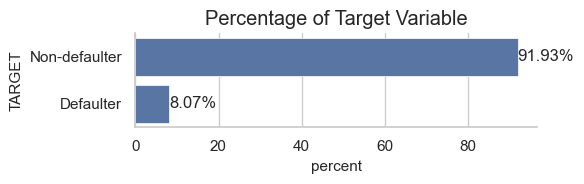

In [6]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=appls_eda, y="TARGET", stat="percent", ax=ax)
ax.bar_label(ax.containers[-1], fmt="{:.2f}%", label_type="edge")
ax.set_yticks([0, 1], ["Non-defaulter", "Defaulter"])
plt.title("Percentage of Target Variable")
plt.savefig("./img/target.png", bbox_inches="tight")
plt.show()

Finally, columns are distinguished by data types.

In [7]:
yn_cols, cat_cols, rating_cols, int_cols, float_cols = (
    credit_data_utils.get_column_types(appls_eda.drop(["SK_ID_CURR"]))
)

#### 3.1.2. <a id='toc3_1_2_'></a>Statistical Inference and $\phi_K$ Correlation                [&#8593;](#toc0_)

Analyzing undersampled data to keep balanced target may better uncover correlations with target. Below one-way ANOVA and Kruskal-Wallis tests are performed to check if distributions of numerical features between samples of different targets are statistically significantly different. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. Feature is deemed significantly different for different targets if null hypotheses of both tests are rejected with p-value less than significance level alpha of 0.05. Chi-square test is performed to compute the chi-square p-value for the hypothesis test of independence of the observed frequencies in the contingency table. The null hypothesis is that categorical feature and target are unrelated. Feature is deemed significantly different for different targets if null hypothesis is rejected with p-value less than significance level alpha of 0.05.

In [8]:
appls_eda_balanced = credit_data_utils.get_balanced_pd_df(appls_eda, "TARGET")
_, drop_num = statistics_utils.difference_ind_samples_num(
    appls_eda_balanced, float_cols + int_cols, "TARGET"
)
_, drop_cat = statistics_utils.difference_ind_samples_cat(
    appls_eda_balanced, yn_cols + cat_cols + rating_cols, "TARGET"
)

Number of instances in balanced data: 39720
Statistically unrelated to target numerical features: ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']
Statistically unrelated to target categorical features: ['FLAG_OWN_REALTY', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_18', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE']


Feature correlation is checked and multicollinear features are marked for removal initially together with features statistically unrelated to target. 

In [9]:
drop_multicorr = [
    "DEF_30_CNT_SOCIAL_CIRCLE",  # related to DEF_60_CNT_SOCIAL_CIRCLE
    "AMT_CREDIT",  # related to AMT_GOODS_PRICE
    "ELEVATORS_AVG",  # related to APARTMENTS_AVG
    "LIVINGAPARTMENTS_AVG",  # related to APARTMENTS_AVG
    "LIVINGAREA_AVG",  # related to APARTMENTS_AVG
    "TOTALAREA_MODE",  # related to APARTMENTS_AVG
    "ENTRANCES_AVG",  # related to APARTMENTS_AVG
    "FLOORSMIN_AVG",  # related to FLOORSMAX_AVG
    "REGION_RATING_CLIENT",  # related to REGION_RATING_CLIENT_W_CITY
    "LIVE_CITY_NOT_WORK_CITY",  # related to REG_CITY_NOT_WORK_CITY
    "FLAG_OWN_CAR",  # related to OWN_CAR_AGE
    "FLAG_EMP_PHONE",  # related to NAME_INCOME_TYPE
    "FLAG_DOCUMENT_6",  # related to NAME_INCOME_TYPE
]
appls_eda_balanced = appls_eda_balanced.drop(
    columns=drop_num + drop_cat + drop_multicorr
)
appls_eda = appls_eda.drop(drop_num + drop_cat + drop_multicorr)

Finally, only features with $\phi_K$ correlation with target equal or greater than 0.05 is kept for further analysis.

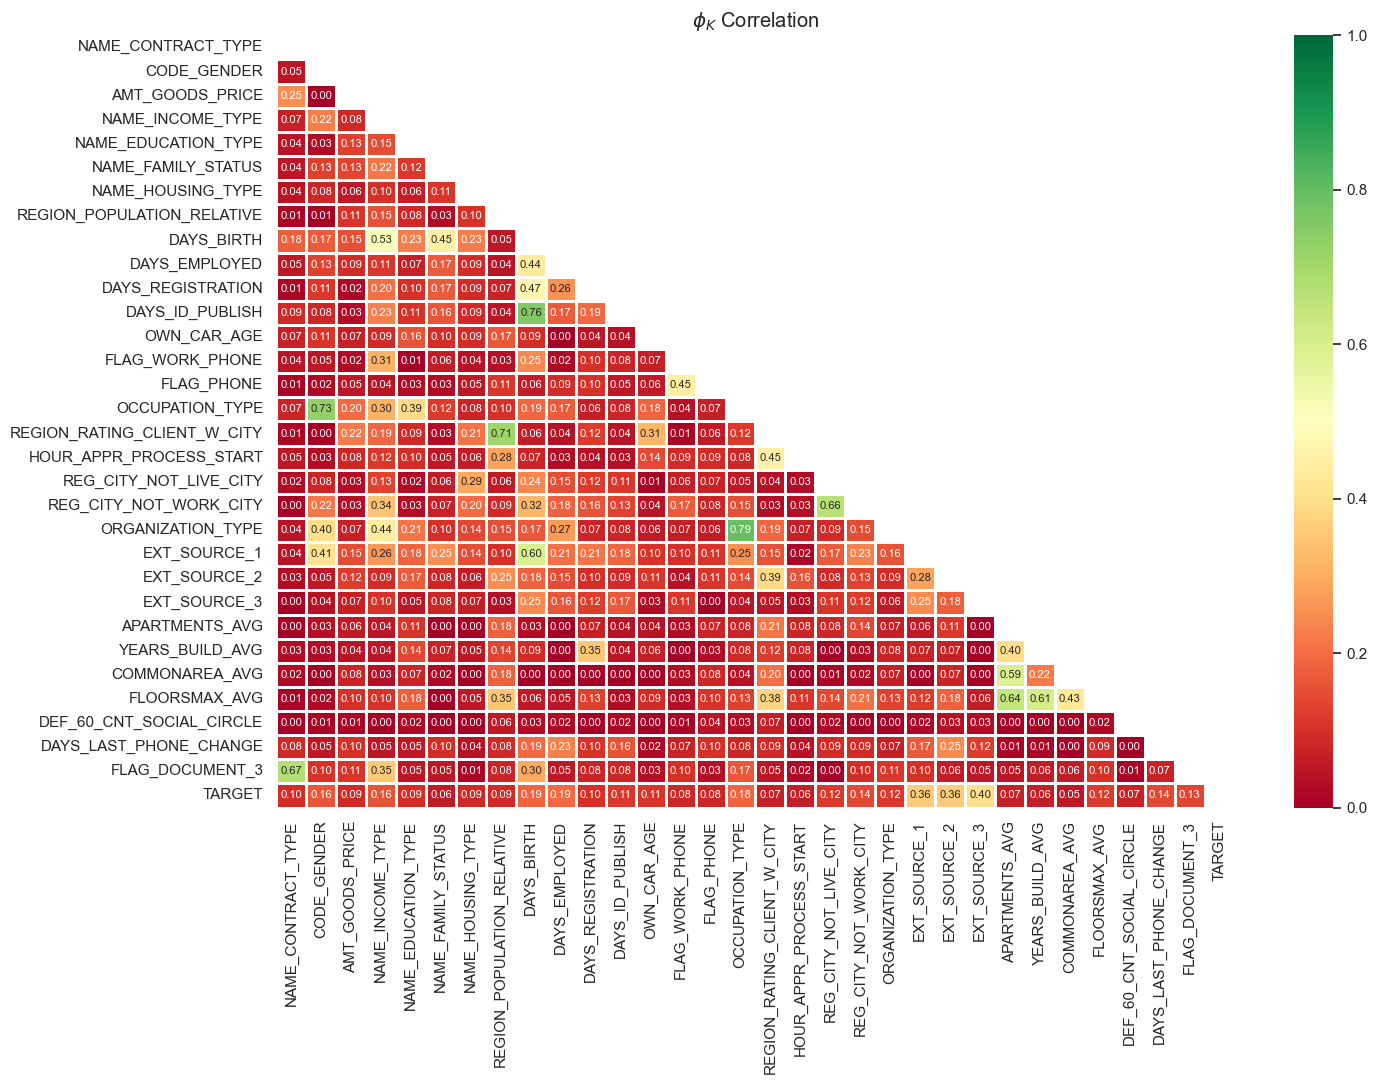

In [10]:
corr_columns = appls_eda_balanced.drop(columns=["SK_ID_CURR"]).pipe(
    statistics_utils.phik_above,
    target="TARGET",
    num_features=float_cols + int_cols,
)
appls_eda_balanced[corr_columns].pipe(
    statistics_utils.draw_phik,
    num_features=float_cols + int_cols,
    size=(15, 11),
)
appls_eda = appls_eda[corr_columns + ["SK_ID_CURR"]]
yn_cols, cat_cols, rating_cols, int_cols, float_cols = (
    credit_data_utils.get_column_types(
        appls_eda.drop(["SK_ID_CURR", "TARGET"])
    )
)
del appls_eda_balanced

#### 3.1.3. <a id='toc3_1_3_'></a>Visual Analysis of Selected Features                [&#8593;](#toc0_)

This is the meaning of the 31 selected features.

In [11]:
display_pl(
    description.filter(
        c.Table.str.contains("application_") & c.Row.is_in(appls_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
1,"""SK_ID_CURR""","""ID of loan in our sample""",null
2,"""TARGET""","""Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)""",null
5,"""NAME_CONTRACT_TYPE""","""Identification if loan is cash or revolving""",null
6,"""CODE_GENDER""","""Gender of the client""",null
13,"""AMT_GOODS_PRICE""","""For consumer loans it is the price of the goods for which the loan is given""",null
…,…,…,…
51,"""COMMONAREA_AVG""","""Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, num…","""normalized"""
54,"""FLOORSMAX_AVG""","""Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, num…","""normalized"""
97,"""DEF_60_CNT_SOCIAL_CIRCLE""","""How many observation of client's social surroundings defaulted on 60 (days past due) DPD""",null


Some of the features have many missing values. Such important features as EXT_SOURCE_3 and EXT_SOURCE_1 also have great proportion of missing values and that must be taken care of in modeling part.

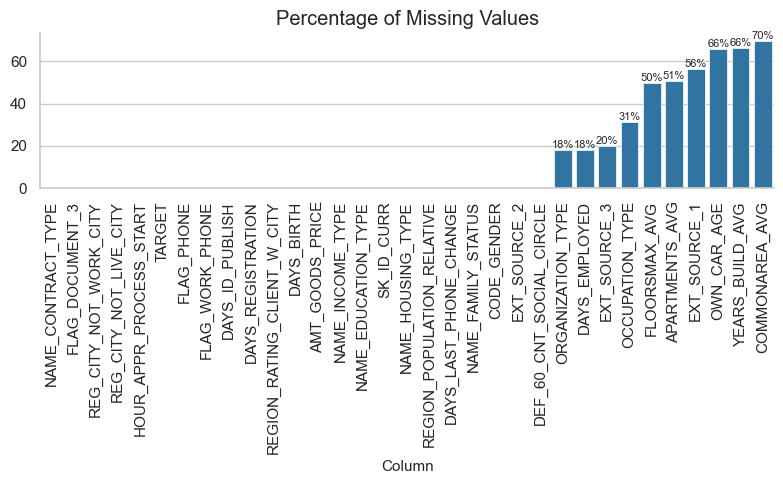

In [12]:
plot_utils.plot_missingness(appls_eda, (8, 5))

Numerically it can be seen that some features are normalized to the range of 0 to 1. Amount features have wide range. It can also have different currencies so coming-up with some relative transformations might be useful. Days ranges are wide but reasonable.

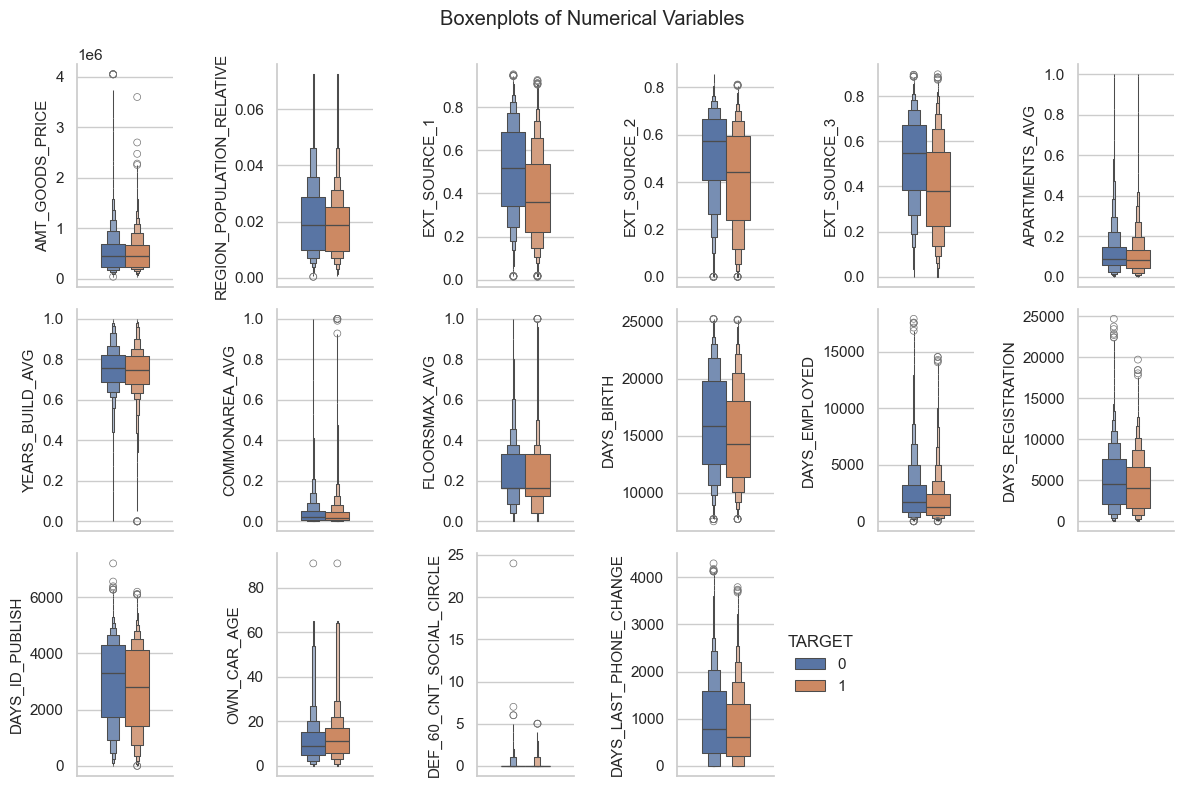

In [13]:
_, _ = plot_utils.plot_boxen_num(
    appls_eda,
    float_cols + int_cols,
    "TARGET",
    nrows=3,
    ncols=6,
    size=(12, 8),
)

It seems that defaulters more often apply in early morning hours, while non-defaulters in afternoon hours. Some occupations as well as organization types are also prone to credit default.

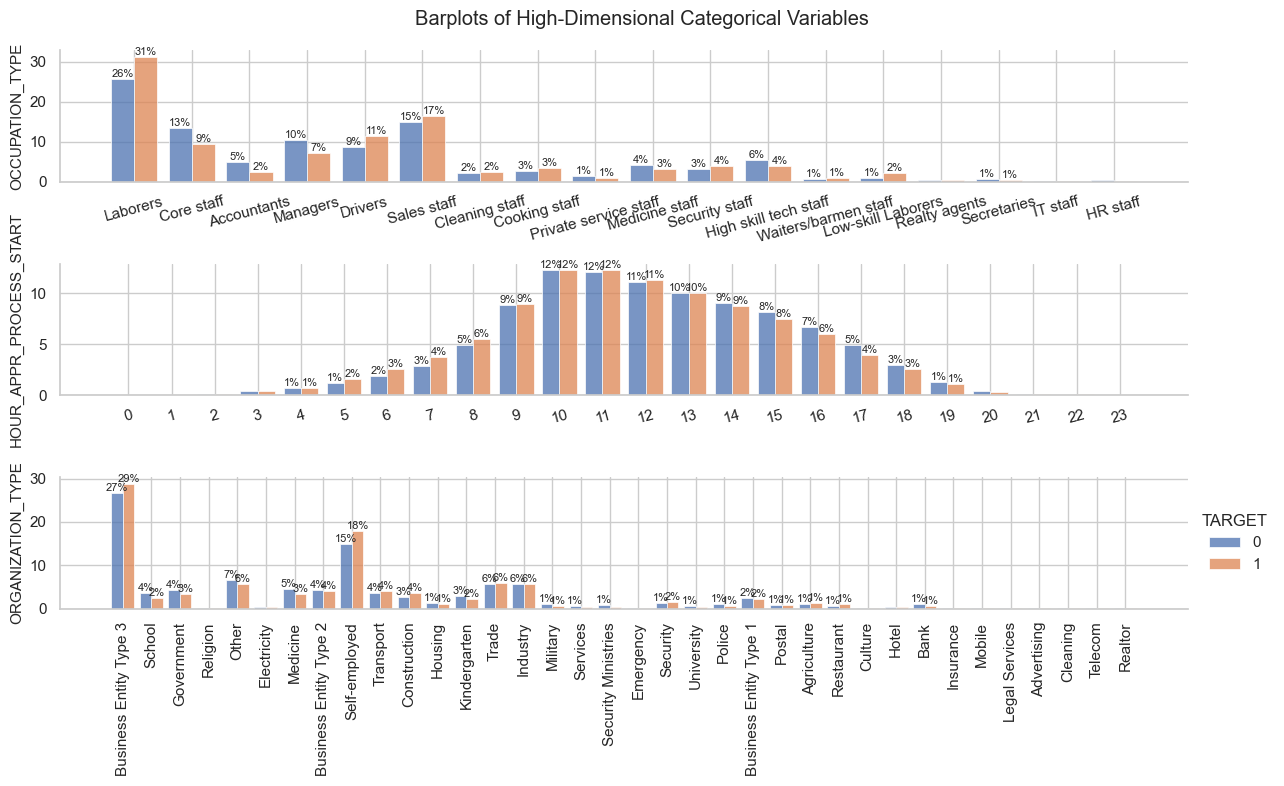

In [14]:
_, _ = plot_utils.plot_bar_cat(
    appls_eda,
    [col for col in cat_cols if appls_eda[col].n_unique() > 12],
    "TARGET",
    nrows=3,
    ncols=1,
    size=(13, 8),
    title="Barplots of High-Dimensional Categorical Variables",
    rotation=15,
)
plt.xticks(rotation=90)
plt.show()

Income types, education, marital status and housing can also indicate about higher probability for default.

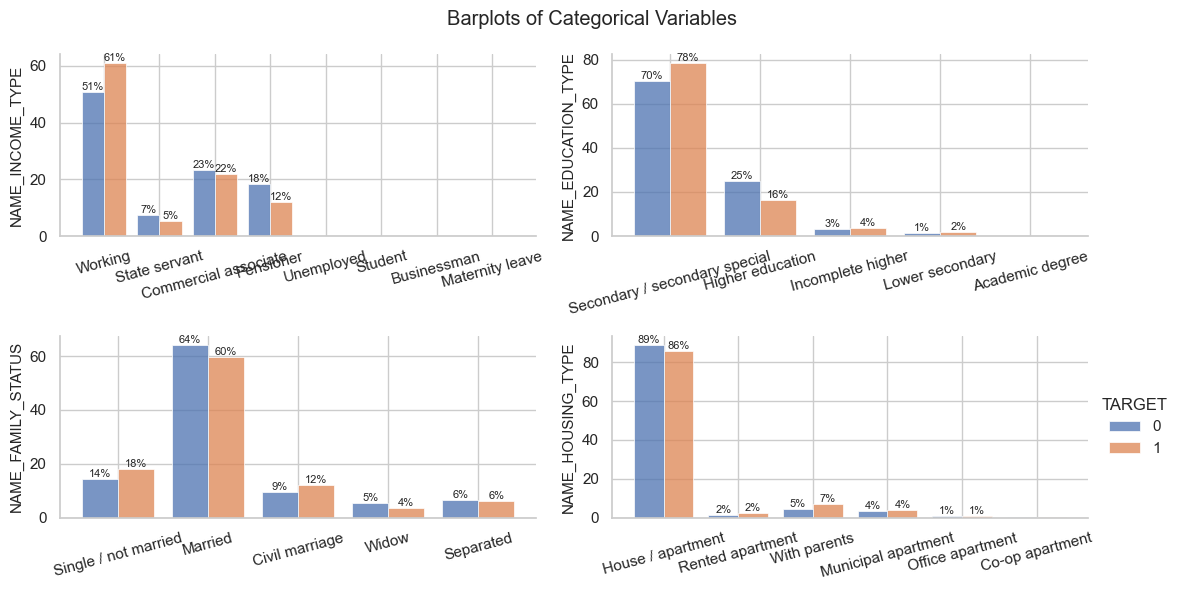

In [15]:
_, _ = plot_utils.plot_bar_cat(
    appls_eda,
    [col for col in cat_cols if 4 < appls_eda[col].n_unique() <= 12],
    "TARGET",
    nrows=2,
    ncols=2,
    size=(12, 6),
    title="Barplots of Categorical Variables",
    rotation=15,
)

Provision of some documents, living and working not in the registration city, as well as living in particular region, being of particular gender or taking a particular type of loan also have influence on default risk.

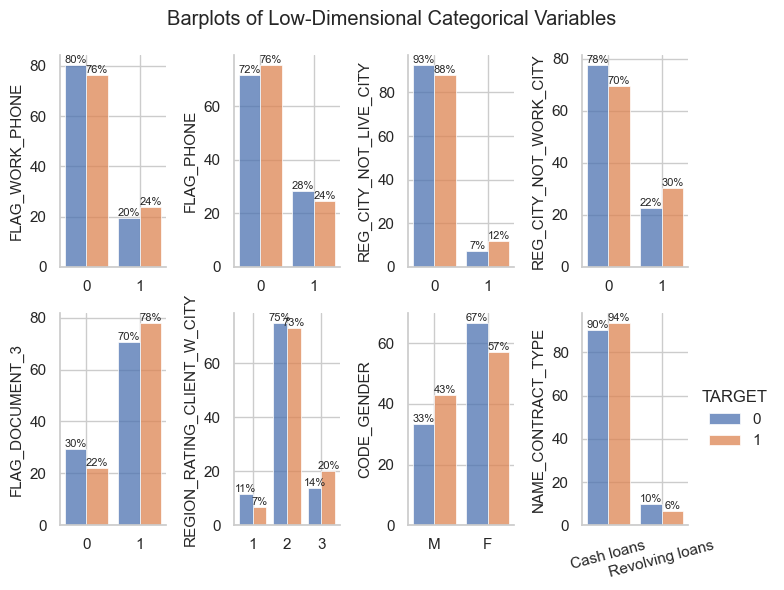

In [16]:
plot_utils.plot_bar_cat(
    appls_eda,
    yn_cols + rating_cols + ["CODE_GENDER", "NAME_CONTRACT_TYPE"],
    "TARGET",
    nrows=2,
    ncols=4,
    size=(8, 6),
    title="Barplots of Low-Dimensional Categorical Variables",
)
plt.xticks(rotation=15)
plt.show()

#### 3.1.4. <a id='toc3_1_4_'></a>Summary of Analysis of Main Home Credit Applications               [&#8593;](#toc0_)

1. Defaulters are much less common (8%) than non-defaulters in Home Credit dataset.
2. 31 static columns from applications seem to be significantly related to the payment difficulties encountered by Home Credit applicants.
3. Using numerical features for relative feature engineering might expose some useful trends.
4. External source features indicate lower values for defaulters.
5. Defaulters may live in slightly smaller apartments and own older cars.
6. Younger applicants with shorter employment history may be likely defaulters.
7. Defaulters also tend to have less days pass since Home Credit registration, ID publication and last phone change.
8. Count of defaulters of client's social surroundings can also provide additional insights in evaluating default risk.
9. Defaulters may be a bit more often applying in early day hours.
10. Defaulters tend to be employed in occupations such as laborers, drivers, or sales staff more frequently. They are also more likely to belong to business entity type 3 or to be self-employed.
11. Pensioners, state servants, or commercial associates exhibit a lower frequency of default.
12. A lower level of education is associated with a higher likelihood of default.
13. Not being married or being in a civil marriage is more commonly observed among defaulters.
14. Defaulters are more inclined to reside with their parents.
15. Defaulters are more likely to provide a work phone number and less likely to provide a personal phone number.
16. Defaulters more frequently have a permanent address that does not match their contact address or work address.
17. Document No 3 is provided more often by defaulters.
18. Defaulters more frequently opt for cash loans rather than credit cards (revolving loans).
19. Male applicants demonstrate a higher tendency to default compared to female applicants.
20. Applicants from regions rated as 3 by Home Credit are more prone to defaulting.

### 3.2. <a id='toc3_2_'></a>Previous Credits from Other Institutions                [&#8593;](#toc0_)

All client's previous credits provided by other financial institutions that were reported to Credit Bureau. For every loan in the main sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

#### 3.2.1. <a id='toc3_2_1_'></a>Data Preparation and Basic Analysis        [&#8593;](#toc0_)

After loading the data, selection of rows for the analysis, initial cleaning, and reduction of memory usage by downcasting data types are performed.

In [17]:
bureau_eda = (
    pl.read_csv("./data/bureau.csv")
    .filter(c.SK_ID_CURR.is_in(idx_train))
    .pipe(credit_data_utils.initial_bureau_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
)
bureau_eda = bureau_eda.join(**appls_join)
credit_data_utils.display_basic_info(bureau_eda)
_, cat_cols, _, int_cols, float_cols = credit_data_utils.get_column_types(
    bureau_eda.drop(["SK_ID_CURR", "SK_ID_BUREAU", "TARGET"])
)
bureau_eda.describe()

Size before memory reduction: 191.91 MB
Initial data types Counter({Int64: 8, Float64: 6, String: 3})
Size after memory reduction: 64.41 MB
Final data types Counter({Float32: 6, Int16: 4, Int32: 3, Categorical(ordering='physical'): 3, Int8: 1})
Number of instances: 1171299
Number of duplicates: 0


statistic,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64
"""count""",1.171299e6,1.171299e6,"""1171299""","""1171299""",1.171299e6,1.171299e6,1.100171e6,735562.0,1.171299e6,1.171299e6,1.171297e6,993198.0,780346.0,1.171299e6,"""1171299""",1.171299e6,267406.0,1.171299e6
"""null_count""",0.0,0.0,"""0""","""0""",0.0,0.0,71128.0,435737.0,0.0,0.0,2.0,178101.0,390953.0,0.0,"""0""",0.0,903893.0,0.0
"""mean""",278493.290902,5.8894e6,null,null,-1143.74501,0.887018,500.668203,-1022.747887,1476.985962,0.007278,351920.25,135915.046875,6333.377441,43.854126,null,-596.918623,15350.545898,0.078365
"""std""",102902.162587,537975.697694,null,null,800.38762,38.14056,4952.887188,717.456964,145030.0,0.102612,1056434.5,681679.9375,45371.796875,6901.364746,null,658.163637,243014.875,0.268745
"""min""",100002.0,5e6,null,null,-2922.0,0.0,-2890.0,-3042.0,0.0,0.0,0.0,-4.7056e6,-401346.9375,0.0,null,-2917.0,0.0,0.0
"""25%""",189129.0,5.415286e6,null,null,-1671.0,0.0,-1142.0,-1503.0,0.0,0.0,51120.0,0.0,0.0,0.0,null,-904.0,0.0,0.0
"""50%""",278480.0,5.854853e6,null,null,-985.0,0.0,-333.0,-899.0,0.0,0.0,124690.5,0.0,0.0,0.0,null,-405.0,13.5,0.0
"""75%""",367566.0,6.362872e6,null,null,-470.0,0.0,475.0,-428.0,0.0,0.0,307989.0,39600.0,0.0,0.0,null,-33.0,13984.514648,0.0
"""max""",456255.0,6.843457e6,null,null,0.0,2792.0,31199.0,0.0,1.15987184e8,9.0,1.701e8,1.701e8,4705600.5,3.756681e6,null,0.0,5.7476228e7,1.0


Most of the values are missing in annuity amount column.

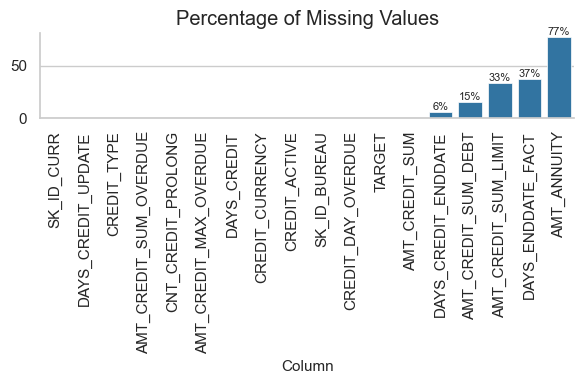

In [18]:
plot_utils.plot_missingness(bureau_eda)

The majority of applicants had loans from other institutions before. However, defaulters more often did not have those.

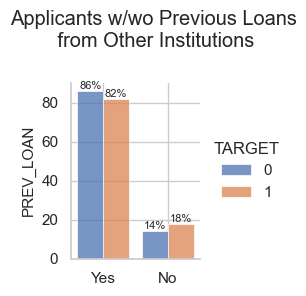

In [19]:
prev_loans = appls_eda.select(["SK_ID_CURR", "TARGET"]).with_columns(
    PREV_LOAN=pl.when(c.SK_ID_CURR.is_in(bureau_eda["SK_ID_CURR"]))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
)
_ = plot_utils.plot_bar_cat(
    prev_loans,
    ["PREV_LOAN"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3, 3),
    title="Applicants w/wo Previous Loans\n from Other Institutions",
)
del prev_loans

#### 3.2.2. <a id='toc3_2_2_'></a>Statistical Inference and $\phi_K$ Correlation        [&#8593;](#toc0_)

Again, balanced subsample is used for statistical analysis to better expose the relationships. It seems that amount and count columns are statistically unrelated, but that could be just the issue of absolute values instead of relative values.

Number of instances in balanced data: 183578
Statistically unrelated to target numerical features: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG']
Statistically unrelated to target categorical features: ['CREDIT_CURRENCY']


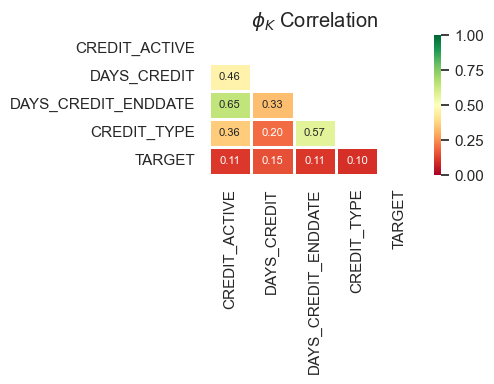

In [20]:
bureau_eda_balanced = credit_data_utils.get_balanced_pd_df(
    bureau_eda, "TARGET"
)
_, drop_num = statistics_utils.difference_ind_samples_num(
    bureau_eda_balanced, float_cols + int_cols, "TARGET"
)
_, drop_cat = statistics_utils.difference_ind_samples_cat(
    bureau_eda_balanced, cat_cols, "TARGET"
)
drop_multicorr = [
    "DAYS_CREDIT_UPDATE",  # related to DAYS_CREDIT
    "DAYS_ENDDATE_FACT",  # related to DAYS_CREDIT
]
bureau_eda_balanced = bureau_eda_balanced.drop(
    columns=drop_num + drop_cat + drop_multicorr
)
corr_columns = bureau_eda_balanced.drop(
    columns=["SK_ID_CURR", "SK_ID_BUREAU"]
).pipe(
    statistics_utils.phik_above,
    target="TARGET",
    num_features=float_cols + int_cols,
)
bureau_eda_balanced[corr_columns].pipe(
    statistics_utils.draw_phik,
    num_features=float_cols + int_cols,
    size=(5, 4),
)
bureau_eda = bureau_eda[corr_columns + ["SK_ID_CURR", "SK_ID_BUREAU"]]
_, cat_cols, _, int_cols, float_cols = credit_data_utils.get_column_types(
    bureau_eda.drop(["SK_ID_CURR", "SK_ID_BUREAU", "TARGET"])
)
del bureau_eda_balanced

Whether the credit is active and its type as well as credit days and enddate seem to be related to the target.

#### 3.2.3. <a id='toc3_2_3_'></a>Visual Analysis of Selected Features        [&#8593;](#toc0_)

This is the meaning of the 4 selected features.

In [21]:
display_pl(
    description.filter(
        c.Table.str.contains("bureau.csv") & c.Row.is_in(bureau_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
125,"""SK_ID_CURR""","""ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau ""","""hashed"""
127,"""CREDIT_ACTIVE""","""Status of the Credit Bureau (CB) reported credits""",null
129,"""DAYS_CREDIT""","""How many days before current application did client apply for Credit Bureau credit""","""time only relative to the application"""
131,"""DAYS_CREDIT_ENDDATE""","""Remaining duration of CB credit (in days) at the time of application in Home Credit""","""time only relative to the application"""
139,"""CREDIT_TYPE""","""Type of Credit Bureau credit (Car, cash,...)""",null


Defaulters have more active credits from other institutions and they more often have credit cards.

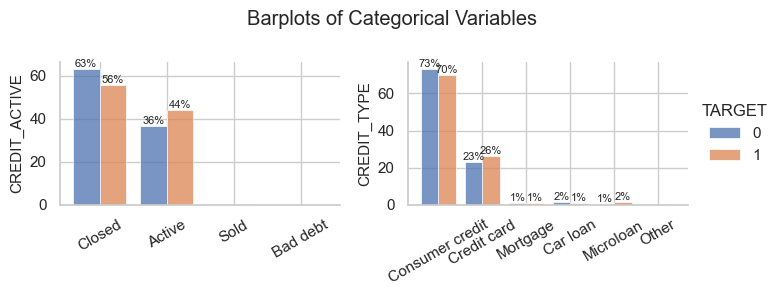

In [22]:
_ = plot_utils.plot_bar_cat(
    bureau_eda,
    cat_cols,
    "TARGET",
    nrows=1,
    ncols=2,
    size=(8, 3),
    rotation=30,
)

The count of previous active credits is higher for defaulters, while the count of previous closed credits is higher for non-defaulters.

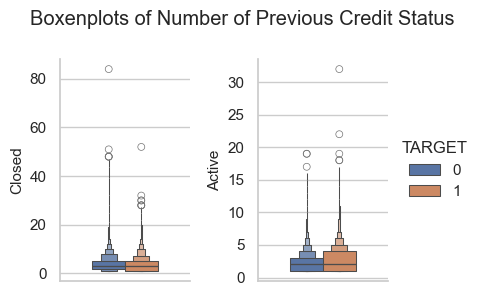

In [23]:
cred_activ = bureau_eda.pivot(
    index="SK_ID_CURR",
    columns="CREDIT_ACTIVE",
    values="CREDIT_ACTIVE",
    aggregate_function="len",
).join(**appls_join)
_ = plot_utils.plot_boxen_num(
    cred_activ,
    ["Closed", "Active"],
    "TARGET",
    nrows=1,
    ncols=2,
    size=(5, 3),
    title="Boxenplots of Number of Previous Credit Status",
)
del cred_activ

While the count of consumer credits are quite similar for defaulters and non-defaulters, the count of credit cards is higher for defaulters.

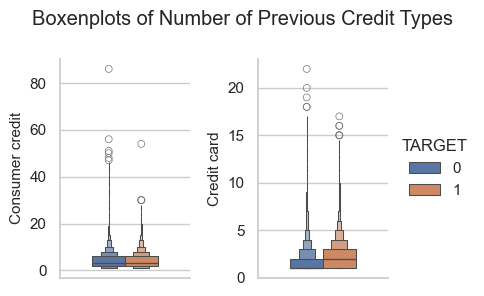

In [24]:
cred_typ = bureau_eda.pivot(
    index="SK_ID_CURR",
    columns="CREDIT_TYPE",
    values="CREDIT_TYPE",
    aggregate_function="len",
).join(**appls_join)
_ = plot_utils.plot_boxen_num(
    cred_typ,
    ["Consumer credit", "Credit card"],
    "TARGET",
    nrows=1,
    ncols=2,
    size=(5, 3),
    title="Boxenplots of Number of Previous Credit Types",
)
del cred_typ

Defaulters seem to have "fresher" credits from other institutions.

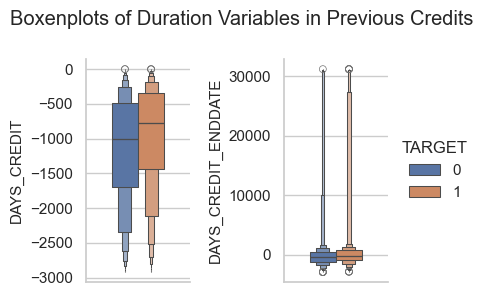

In [25]:
_ = plot_utils.plot_boxen_num(
    bureau_eda,
    int_cols,
    "TARGET",
    nrows=1,
    ncols=2,
    size=(5, 3),
    title="Boxenplots of Duration Variables in Previous Credits",
)

Long DAYS_CREDIT_ENDDATE are for credit cards probably. This creates a very skewed distribution.

In [26]:
bureau_eda.filter(c.DAYS_CREDIT_ENDDATE > 30 * 365)[
    "CREDIT_TYPE"
].value_counts()

CREDIT_TYPE,count
cat,u32
"""Consumer credi…",139
"""Credit card""",28760


#### 3.2.4. <a id='toc3_2_4_'></a>Summary of Analysis of Previous Credits from Other Institutions         [&#8593;](#toc0_)

1. Over 80% of applicants had loans from other institutions, with defaulters showing a tendency to have these loans less frequently.
2. Defaulters tend to have a greater number of active credits from other institutions and are more likely to possess credit cards.
3. Defaulters typically have a higher count of previous active credits, whereas non-defaulters tend to have a higher count of previous closed credits.
4. Although the count of consumer credits is fairly similar for both defaulters and non-defaulters, defaulters exhibit a higher count of credit cards.
5. Defaulters have taken loans from other institutions more recently compared to non-defaulters.
6. Amount and count features do not demonstrate a strict correlation with the target in absolute values.

### 3.3. <a id='toc3_3_'></a>Balance of Previous Credits from Other Institutions                [&#8593;](#toc0_)

Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau.

#### 3.3.1. <a id='toc3_3_1_'></a>Data Preparation     [&#8593;](#toc0_)

After loading the data, selection of rows for the analysis, and reduction of memory usage by downcasting data types are performed. There are no missing values in this table.

In [27]:
bureau_balance_eda = (
    pl.read_csv("./data/bureau_balance.csv")
    .filter(c.SK_ID_BUREAU.is_in(bureau_eda["SK_ID_BUREAU"]))
    .pipe(credit_data_utils.reduce_memory_usage_pl)
)
bureau_join = {
    "other": bureau_eda.select(["SK_ID_BUREAU", "TARGET"]),
    "on": "SK_ID_BUREAU",
    "how": "left",
}
bureau_balance_eda = bureau_balance_eda.join(**bureau_join)
credit_data_utils.display_basic_info(bureau_balance_eda)
print(
    f"Number of unique loans: {bureau_balance_eda['SK_ID_BUREAU'].n_unique()}"
)
print(
    "First balance:"
    f" {bureau_balance_eda['MONTHS_BALANCE'].abs().max()} months ago"
)
bureau_balance_eda.describe()

Size before memory reduction: 358.61 MB
Initial data types Counter({Int64: 2, String: 1})
Size after memory reduction: 112.07 MB
Final data types Counter({Int32: 1, Int16: 1, Categorical(ordering='physical'): 1})
Number of instances: 11751016
Number of duplicates: 0
Number of unique loans: 417936
First balance: 96 months ago


statistic,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,TARGET
str,f64,f64,str,f64
"""count""",1.1751016e7,1.1751016e7,"""11751016""",1.1751016e7
"""null_count""",0.0,0.0,"""0""",0.0
"""mean""",5.9771e6,-28.648958,null,0.069608
"""std""",512938.997893,22.077848,null,0.254486
"""min""",5.008804e6,-96.0,null,0.0
"""25%""",5.58129e6,-43.0,null,0.0
"""50%""",6.022823e6,-24.0,null,0.0
"""75%""",6.398401e6,-10.0,null,0.0
"""max""",6.842888e6,0.0,null,1.0


In [28]:
display_pl(
    description.filter(
        c.Table.str.contains("bureau_balance")
        & c.Row.is_in(bureau_balance_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
143,"""MONTHS_BALANCE""","""Month of balance relative to application date (-1 means the freshest balance date)""","""time only relative to the application"""
144,"""STATUS""","""Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 …",null


Seems that unknown status is quite common and should still mean person not being late for installment.

In [29]:
bureau_balance_eda["STATUS"].value_counts()

STATUS,count
cat,u32
"""C""",5618553
"""0""",3688286
"""X""",2266724
"""1""",124087
"""2""",12585
"""5""",32807
"""4""",3133
"""3""",4841


#### 3.3.2. <a id='toc3_3_2_'></a>Analysis of the Latest Month Balance     [&#8593;](#toc0_)

Considering only the latest month, it can be seen that non-defaulters have more closed credits, while defaulters tend to have more active credits or credits with unknown status. Also defaulters have a more recent balance history.

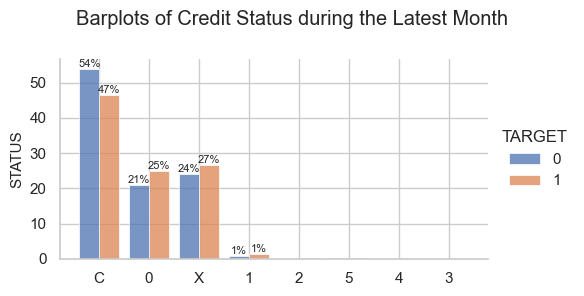

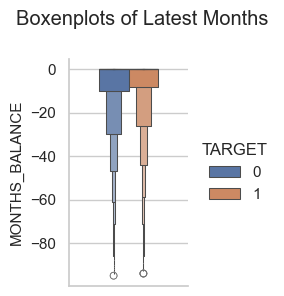

In [30]:
last_status_bureau_balance = bureau_balance_eda.group_by(c.SK_ID_BUREAU).agg(
    cs.exclude("SK_ID_BUREAU")
    .filter(c.MONTHS_BALANCE == c.MONTHS_BALANCE.max())
    .first()
)
_ = plot_utils.plot_bar_cat(
    last_status_bureau_balance,
    ["STATUS"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(6, 3),
    title="Barplots of Credit Status during the Latest Month",
)
_ = plot_utils.plot_boxen_num(
    last_status_bureau_balance,
    ["MONTHS_BALANCE"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3, 3),
    title="Boxenplots of Latest Months",
)
del last_status_bureau_balance

In [31]:
del bureau_eda, bureau_balance_eda

#### 3.3.3. <a id='toc3_3_3_'></a>Summary of Analysis of Balance of Previous Credits from Other Institutions     [&#8593;](#toc0_)

1. In the latest month, non-defaulters tend to have more closed credits, whereas defaulters typically exhibit more active credits or credits with an unknown status.
2. Defaulters tend to possess a more recent balance history on previous credits from other institutions.

### 3.4. <a id='toc3_4_'></a>Previous Applications for Home Credit Loans              [&#8593;](#toc0_)

This table contains all previous applications for Home Credit loans of clients who have loans in main table. There is one row for each previous application related to loans in the main table.

#### 3.4.1. <a id='toc3_4_1_'></a>Data Preparation and Basic Analysis    [&#8593;](#toc0_)

After loading the data, initial cleaning, and reduction of memory usage by downcasting data types are performed. It is worth mentioning that XNA indicates missing values, while XAP indicates that feature is not applicable.

In [32]:
prev_appls_eda = (
    pl.read_csv("./data/previous_application.csv")
    .filter(c.SK_ID_CURR.is_in(idx_train))
    .pipe(credit_data_utils.initial_prev_application_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
    .join(**appls_join)
)
credit_data_utils.display_basic_info(prev_appls_eda)
yn_cols, cat_cols, _, int_cols, float_cols = (
    credit_data_utils.get_column_types(
        prev_appls_eda.drop(["SK_ID_CURR", "SK_ID_PREV", "TARGET"])
    )
)
prev_appls_eda.describe()

Size before cleaning: 1048.69 MB
Size after cleaning: 618.29 MB
Number of columns left: 37
Size before memory reduction: 618.29 MB
Initial data types Counter({String: 15, Int64: 13, Float64: 8, Enum(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']): 1})
Size after memory reduction: 138.40 MB
Final data types Counter({Categorical(ordering='physical'): 15, Float32: 8, Int16: 7, Int32: 3, Int8: 3, Enum(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']): 1})
Number of instances: 1131338
Number of duplicates: 0


statistic,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
str,f64,f64,str,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64
"""count""",1.131338e6,1.131338e6,"""1131091""",885636.0,1.131338e6,1.131337e6,531849.0,875718.0,"""1131338""","""1131338""",1.131338e6,1.131338e6,531849.0,3824.0,3824.0,"""677723""","""1131338""",1.131338e6,"""712585""","""1127868""","""575501""","""1130102""","""493771""","""885639""","""410708""","""1131338""",622314.0,"""559480""",885639.0,"""788004""","""1131091""",42856.0,654947.0,618825.0,537491.0,526990.0,682225.0,1.131338e6
"""null_count""",0.0,0.0,"""247""",245702.0,0.0,1.0,599489.0,255620.0,"""0""","""0""",0.0,0.0,599489.0,1.127514e6,1.127514e6,"""453615""","""0""",0.0,"""418753""","""3470""","""555837""","""1236""","""637567""","""245699""","""720630""","""0""",509024.0,"""571858""",245699.0,"""343334""","""247""",1.088482e6,476391.0,512513.0,593847.0,604348.0,449113.0,0.0
"""mean""",1.9228e6,278784.703879,null,15825.163086,175031.984375,196130.375,6655.916504,226160.765625,null,null,0.994891,0.996464,0.080233,0.189592,0.770321,null,null,-880.304533,null,null,null,null,null,null,null,null,566.25754,null,16.049511,null,null,-1051.148684,-1104.188282,-672.797405,-994.764965,-976.531386,0.330047,0.086772
"""std""",532642.581525,102807.46584,null,14708.651367,293129.65625,318981.375,20989.402344,315387.4375,null,null,0.071294,0.059356,0.107791,0.091978,0.100737,null,null,783.523834,null,null,null,null,null,null,null,null,9034.590715,null,14.561707,null,null,934.787584,791.780973,926.924895,753.16109,749.326201,0.47023,0.281501
"""min""",1.000001e6,100002.0,null,0.0,0.0,0.0,-0.9,0.0,null,null,0.0,0.0,-0.000014,0.034781,0.37315,null,null,-2922.0,null,null,null,null,null,null,null,null,0.0,null,0.0,null,null,-2922.0,-2892.0,-2801.0,-2889.0,-2848.0,0.0,0.0
"""25%""",1.461768e6,189583.0,null,6255.810059,19755.0,24876.0,0.0,49815.0,null,null,1.0,1.0,0.0,0.160716,0.715645,null,null,-1312.0,null,null,null,null,null,null,null,null,25.0,null,6.0,null,null,-2068.0,-1676.0,-1360.0,-1568.0,-1540.0,0.0,0.0
"""50%""",1.922834e6,279475.0,null,11218.455078,70861.5,80554.5,1795.5,110191.5,null,null,1.0,1.0,0.06256,0.189136,0.835095,null,null,-583.0,null,null,null,null,null,null,null,null,64.0,null,12.0,null,null,-629.0,-868.0,-477.0,-800.0,-780.0,0.0,0.0
"""75%""",2.383846e6,367839.0,null,20378.160156,180000.0,215640.0,7704.0,229500.0,null,null,1.0,1.0,0.108912,0.19333,0.852537,null,null,-271.0,null,null,null,null,null,null,null,null,350.0,null,24.0,null,null,-295.0,-454.0,3.0,-349.0,-333.0,1.0,0.0
"""max""",2.845381e6,456255.0,null,418058.15625,5.85e6,4509688.5,3.060045e6,5.85e6,null,null,1.0,1.0,1.0,1.0,1.0,null,null,-1.0,null,null,null,null,null,null,null,null,4e6,null,84.0,null,null,-2.0,-2.0,2389.0,-2.0,-2.0,1.0,1.0


Some features have almost all values missing. Also, missingness is related to contract types, e.g., downpayment is only applicable to consumer loans.

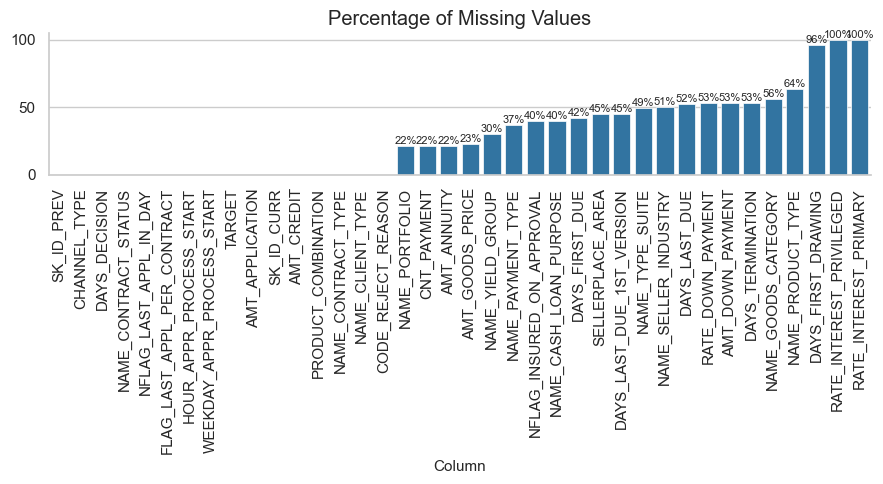

In [33]:
plot_utils.plot_missingness(prev_appls_eda, (9, 5))

Most of the current applicants did apply before for Home Credit loan. This proportion is slightly lower for defaulters.

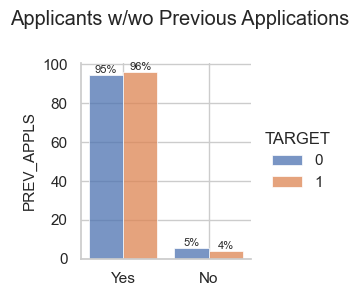

In [34]:
prev_appls = appls_eda.select(["SK_ID_CURR", "TARGET"]).with_columns(
    PREV_APPLS=pl.when(c.SK_ID_CURR.is_in(prev_appls_eda["SK_ID_CURR"]))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
)
_ = plot_utils.plot_bar_cat(
    prev_appls,
    ["PREV_APPLS"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3.5, 3),
    title="Applicants w/wo Previous Applications",
)
del prev_appls

#### 3.4.2. <a id='toc3_4_2_'></a>Statistical Inference and $\phi_K$ Correlation    [&#8593;](#toc0_)

Again, balanced subsample is used for statistical analysis to better expose the relationships. Feature correlation is checked and multicollinear features are marked for removal initially together with features statistically unrelated to target. It seems that amount column is statistically unrelated, but that could be just the issue of absolute values instead of relative values. Also, flag columns do not seem informative, as well as features with many missing values.

Number of instances in balanced data: 196338
Statistically unrelated to target numerical features: ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']
Statistically unrelated to target categorical features: ['NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_PAYMENT_TYPE']


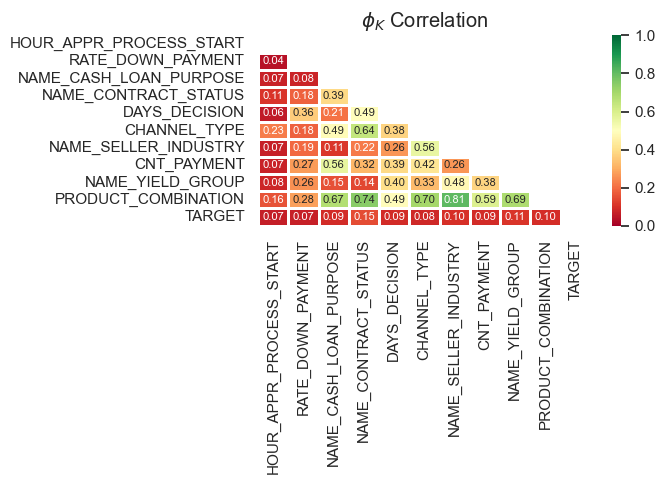

In [35]:
prev_appls_eda_balanced = credit_data_utils.get_balanced_pd_df(
    prev_appls_eda, "TARGET"
)
_, drop_num = statistics_utils.difference_ind_samples_num(
    prev_appls_eda_balanced, float_cols + int_cols, "TARGET"
)
_, drop_cat = statistics_utils.difference_ind_samples_cat(
    prev_appls_eda_balanced, yn_cols + cat_cols, "TARGET"
)
drop_multicorr = [
    "NAME_PRODUCT_TYPE",  # can't calculate matrix
    "DAYS_FIRST_DRAWING",  # related to DAYS_DECISION, most missing
    "DAYS_FIRST_DUE",  # related to DAYS_DECISION
    "DAYS_LAST_DUE_1ST_VERSION",  # related to DAYS_DECISION
    "DAYS_LAST_DUE",  # related to DAYS_DECISION
    "DAYS_TERMINATION",  # related to DAYS_DECISION
    "CODE_REJECT_REASON",  # related to NAME_CONTRACT_STATUS
    "NAME_GOODS_CATEGORY",  # related to NAME_SELLER_INDUSTRY, most missing
    "NAME_PORTFOLIO",  # related to CHANNEL TYPE
]
prev_appls_eda_balanced = prev_appls_eda_balanced.drop(
    columns=drop_num + drop_cat + drop_multicorr
)
corr_columns = prev_appls_eda_balanced.drop(
    columns=["SK_ID_CURR", "SK_ID_PREV"]
).pipe(
    statistics_utils.phik_above,
    target="TARGET",
    num_features=float_cols + int_cols,
)
prev_appls_eda_balanced[corr_columns].pipe(
    statistics_utils.draw_phik,
    num_features=float_cols + int_cols,
    size=(7, 5),
)
prev_appls_eda = prev_appls_eda[
    corr_columns + ["SK_ID_CURR", "SK_ID_PREV", "NAME_PRODUCT_TYPE"]
]
_, cat_cols, _, int_cols, float_cols = credit_data_utils.get_column_types(
    prev_appls_eda.drop(["SK_ID_CURR", "SK_ID_PREV", "TARGET"])
)
del prev_appls_eda_balanced

#### 3.4.3. <a id='toc3_4_3_'></a>Visual Analysis of Selected Features    [&#8593;](#toc0_)

This is the meaning of the 10 selected features.

In [36]:
display_pl(
    description.filter(
        c.Table.str.contains("previous") & c.Row.is_in(prev_appls_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
177,"""SK_ID_CURR""","""ID of loan in our sample""","""hashed"""
185,"""HOUR_APPR_PROCESS_START""","""Approximately at what day hour did the client apply for the previous application""","""rounded"""
189,"""RATE_DOWN_PAYMENT""","""Down payment rate normalized on previous credit""","""normalized"""
192,"""NAME_CASH_LOAN_PURPOSE""","""Purpose of the cash loan""",null
193,"""NAME_CONTRACT_STATUS""","""Contract status (approved, cancelled, ...) of previous application""",null
…,…,…,…
202,"""CHANNEL_TYPE""","""Through which channel we acquired the client on the previous application""",null
204,"""NAME_SELLER_INDUSTRY""","""The industry of the seller""",null
205,"""CNT_PAYMENT""","""Term of previous credit at application of the previous application""",null


Defaulters have lower median down payment and more recent decision on application than non-defaulters. Their average payment count is slightly lower than that of non-defaulters'.

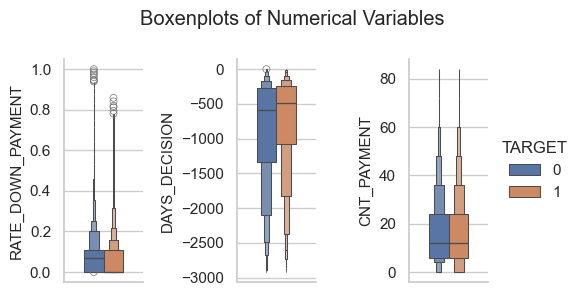

In [37]:
_, _ = plot_utils.plot_boxen_num(
    prev_appls_eda,
    float_cols + int_cols,
    "TARGET",
    nrows=1,
    ncols=3,
    size=(6, 3),
)

Defaulters more often have refused or canceled applications. Their yield group is also more often high. Defaulters are more often just passers-by in comparison to non defaulters, who have actually been checked before.

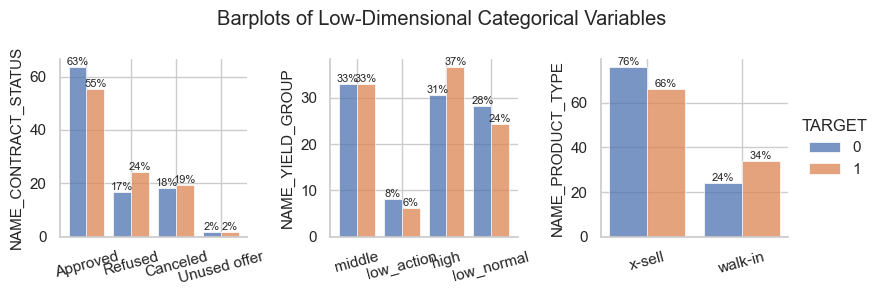

In [38]:
_, _ = plot_utils.plot_bar_cat(
    prev_appls_eda,
    [col for col in cat_cols if prev_appls_eda[col].n_unique() <= 5],
    "TARGET",
    nrows=1,
    ncols=3,
    size=(9, 3),
    title="Barplots of Low-Dimensional Categorical Variables",
    rotation=15,
)
plt.show()

Defaulters more often applied for loans with connectivity sellers. Their applications more often came from credit and cash offices.

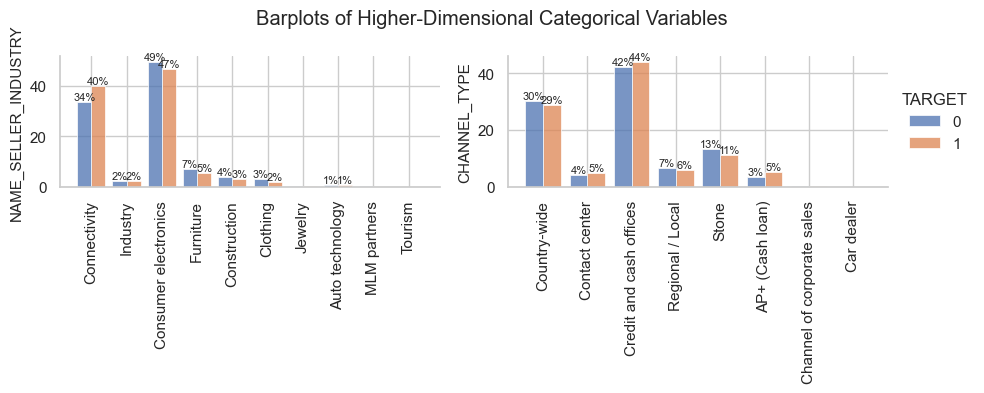

In [39]:
_, _ = plot_utils.plot_bar_cat(
    prev_appls_eda,
    ["NAME_SELLER_INDUSTRY", "CHANNEL_TYPE"],
    "TARGET",
    nrows=1,
    ncols=2,
    size=(10, 4),
    title="Barplots of Higher-Dimensional Categorical Variables",
    rotation=90,
)
plt.show()

Again, with previous applications defaulters tended to apply in early morning hours more often than non-defaulters. Defaulters more often applied for cash loans or credit card as passers by.

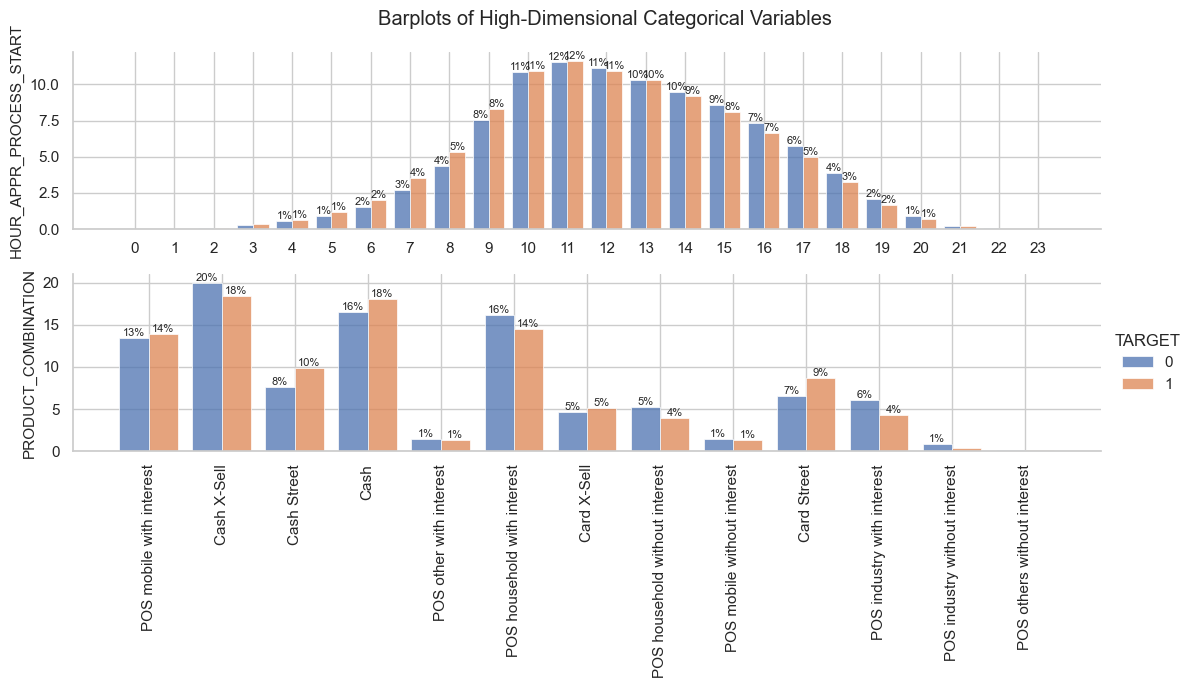

In [40]:
_, _ = plot_utils.plot_bar_cat(
    prev_appls_eda,
    ["HOUR_APPR_PROCESS_START", "PRODUCT_COMBINATION"],
    "TARGET",
    nrows=2,
    ncols=1,
    size=(12, 7),
    title="Barplots of High-Dimensional Categorical Variables",
)
plt.xticks(rotation=90)
plt.show()

In [41]:
del prev_appls_eda

#### 3.4.4. <a id='toc3_4_4_'></a>Summary of Analysis of Previous Applications for Home Credit Loans    [&#8593;](#toc0_)

1. Most of the current applicants have previously applied for a Home Credit loan, although this proportion is slightly lower for defaulters.
2. Defaulters typically have a lower median down payment and a more recent decision on their application compared to non-defaulters.
3. The average payment count is slightly lower for defaulters.
4. Defaulters more frequently experienced refusal or cancellation of their previous applications.
5. Previous defaulters' applications were more often classified in the high yield group.
6. For previous applications, current defaulters are more frequently categorized as passers-by, whereas non-defaulters have undergone prior checks.
7. Defaulters more commonly applied for loans with connectivity sellers.
8. Applications of current defaulters more frequently originated from credit and cash offices.
9. Defaulters slightly more often submitted applications in the early hours of the day with their previous applications.
10. Current defaulters more frequently applied for cash loans or credit cards as passers-by in their previous applications.


### 3.5. <a id='toc3_5_'></a>Balance of Previous Point of Sales and Cash Loans from Home Credit                [&#8593;](#toc0_)

This table contains monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in the main table. 

#### 3.5.1. <a id='toc3_5_1_'></a>Data Preparation and Basic Insights  [&#8593;](#toc0_)

After loading the data, initial cleaning, and reduction of memory usage by downcasting data types are performed. 

In [42]:
pos_cash_eda = (
    pl.read_csv("./data/POS_CASH_balance.csv")
    .filter(c.SK_ID_CURR.is_in(idx_train))
    .pipe(credit_data_utils.initial_pos_cash_credit_card_installments_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
    .join(**appls_join)
)
credit_data_utils.display_basic_info(pos_cash_eda)
_, cat_cols, _, int_cols, _ = credit_data_utils.get_column_types(
    pos_cash_eda.drop(["SK_ID_CURR", "SK_ID_PREV", "TARGET"])
)
print(
    "Number of unique POS or cash loans:"
    f" {pos_cash_eda['SK_ID_PREV'].n_unique()}"
)
print(
    f"First balance: {pos_cash_eda['MONTHS_BALANCE'].abs().max()} months ago"
)
pos_cash_eda.describe()

Size before cleaning: 471.63 MB
Size after cleaning: 471.82 MB
Number of columns left: 8
Size before memory reduction: 471.82 MB
Initial data types Counter({Int64: 7, String: 1})
Size after memory reduction: 171.91 MB
Final data types Counter({Int32: 4, Int16: 3, Categorical(ordering='physical'): 1})
Number of instances: 6834611
Number of duplicates: 0
Number of unique POS or cash loans: 640308
First balance: 96 months ago


statistic,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET
str,f64,f64,f64,f64,f64,str,f64,f64,f64
"""count""",6.834611e6,6.834611e6,6.834611e6,6.81701e6,6.816992e6,"""6834610""",6.834611e6,6.834611e6,6.834611e6
"""null_count""",0.0,0.0,0.0,17601.0,17619.0,"""1""",0.0,0.0,0.0
"""mean""",1.9037e6,278701.938202,-34.947399,17.040309,10.473807,null,11.797112,0.600041,0.074182
"""std""",536039.131555,102656.857008,26.052385,12.009181,11.148098,null,132.606761,30.729719,0.262067
"""min""",1.000001e6,100002.0,-96.0,1.0,0.0,null,0.0,0.0,0.0
"""25%""",1.434738e6,189873.0,-54.0,10.0,3.0,null,0.0,0.0,0.0
"""50%""",1.897216e6,279190.0,-28.0,12.0,7.0,null,0.0,0.0,0.0
"""75%""",2.369174e6,367476.0,-13.0,24.0,14.0,null,0.0,0.0,0.0
"""max""",2.843499e6,456255.0,-1.0,84.0,84.0,null,4231.0,3373.0,1.0


This is the meaning of all the features in the table.

In [43]:
display_pl(
    description.filter(
        c.Table.str.contains("POS_CASH") & c.Row.is_in(pos_cash_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
146,"""SK_ID_CURR""","""ID of loan in our sample""",null
147,"""MONTHS_BALANCE""","""Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are no…","""time only relative to the application"""
148,"""CNT_INSTALMENT""","""Term of previous credit (can change over time)""",null
149,"""CNT_INSTALMENT_FUTURE""","""Installments left to pay on the previous credit""",null
150,"""NAME_CONTRACT_STATUS""","""Contract status during the month""",null
151,"""SK_DPD""","""DPD (days past due) during the month of previous credit""",null
152,"""SK_DPD_DEF""","""DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit""",null


Most of the current applicants have POS or cash loans from Home Credit they payed or pay installments for. Defaulters slightly more often have these loans.

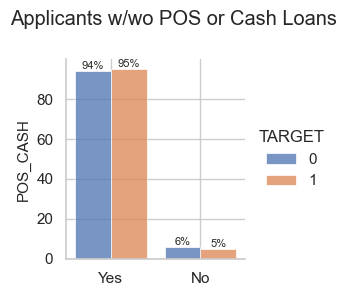

In [44]:
pos_cash = appls_eda.select(["SK_ID_CURR", "TARGET"]).with_columns(
    POS_CASH=pl.when(c.SK_ID_CURR.is_in(pos_cash_eda["SK_ID_CURR"]))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
)
_ = plot_utils.plot_bar_cat(
    pos_cash,
    ["POS_CASH"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3.5, 3),
    title="Applicants w/wo POS or Cash Loans",
)
del pos_cash

Only count columns have a small portion of missing values.

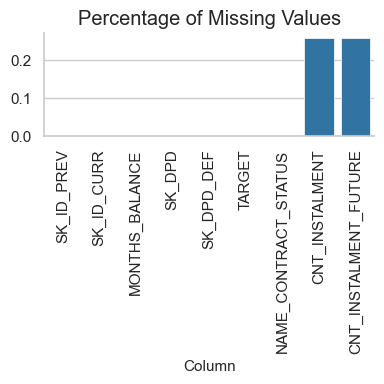

In [45]:
plot_utils.plot_missingness(pos_cash_eda, (4, 4))

#### 3.5.2. <a id='toc3_5_2_'></a>Analysis of the Latest Month Balance  [&#8593;](#toc0_)

Analyzing only the latest month balance, it seems that only the indication of month is different for defaulters and non-defaulters.

Number of instances in balanced data: 95128


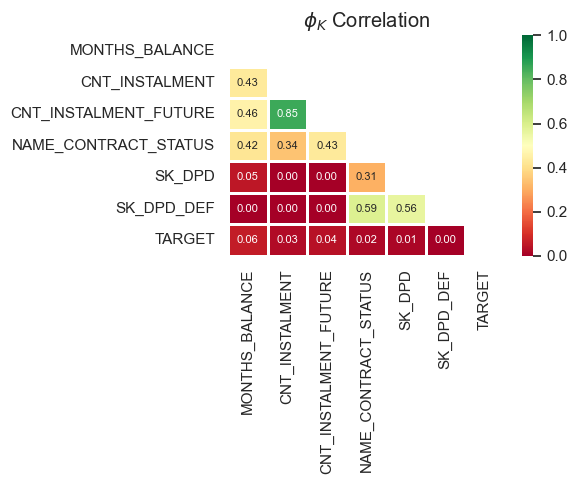

In [46]:
last_status_pos_cash = pos_cash_eda.group_by(c.SK_ID_PREV).agg(
    cs.exclude("SK_ID_CURR")
    .filter(c.MONTHS_BALANCE == c.MONTHS_BALANCE.max())
    .first()
)
last_status_pos_cash_balanced = credit_data_utils.get_balanced_pd_df(
    last_status_pos_cash, "TARGET"
)
last_status_pos_cash_balanced.drop(columns=["SK_ID_PREV"]).pipe(
    statistics_utils.draw_phik,
    num_features=int_cols,
    size=(6, 5),
)
del last_status_pos_cash_balanced

Defaulters have more recent update on POS or cash loan balance.

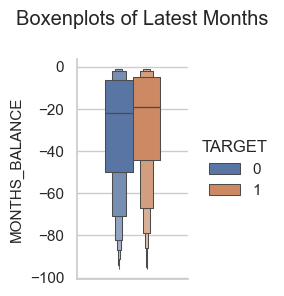

In [47]:
_ = plot_utils.plot_boxen_num(
    last_status_pos_cash,
    ["MONTHS_BALANCE"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3, 3),
    title="Boxenplots of Latest Months",
)

In [48]:
del last_status_pos_cash, pos_cash_eda

#### 3.5.3. <a id='toc3_5_3_'></a>Summary of Analysis of Balance of Previous Point of Sales and Cash Loans from Home Credit  [&#8593;](#toc0_)

1. The majority of current applicants have POS or cash loans from Home Credit for which they have paid or are paying installments.
2. Defaulters exhibit a slightly higher frequency of having POS or cash loans from Home Credit.
3. Updates for POS or cash loan balances are more recent for defaulters.

### 3.6. <a id='toc3_6_'></a>Balance of Previous Credit Cards from Home Credit                [&#8593;](#toc0_)

This table contains monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in
Home Credit (credit card) related to loans in the main table.

#### 3.6.1. <a id='toc3_6_1_'></a>Data Preparation and Basic Insights  [&#8593;](#toc0_)

After loading the data, initial cleaning, and reduction of memory usage by downcasting data types are performed.

In [49]:
credit_card_eda = (
    pl.read_csv("./data/credit_card_balance.csv")
    .filter(c.SK_ID_CURR.is_in(idx_train))
    .pipe(credit_data_utils.initial_pos_cash_credit_card_installments_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
    .join(**appls_join)
)
credit_data_utils.display_basic_info(credit_card_eda)
_, cat_cols, _, int_cols, float_cols = credit_data_utils.get_column_types(
    credit_card_eda.drop(["SK_ID_CURR", "SK_ID_PREV", "TARGET"])
)
print(
    "Number of unique credit cards:"
    f" {credit_card_eda['SK_ID_PREV'].n_unique()}"
)
print(
    "First balance:"
    f" {credit_card_eda['MONTHS_BALANCE'].abs().max()} months ago"
)
credit_card_eda.describe()

Size before cleaning: 476.21 MB
Size after cleaning: 476.17 MB
Number of columns left: 23
Size before memory reduction: 476.17 MB
Initial data types Counter({Int64: 11, Float64: 11, String: 1})
Size after memory reduction: 187.69 MB
Final data types Counter({Float32: 11, Int16: 7, Int32: 3, Int8: 1, Categorical(ordering='physical'): 1})
Number of instances: 2585374
Number of duplicates: 0
Number of unique credit cards: 70130
First balance: 96 months ago


statistic,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64
"""count""",2.585374e6,2.585374e6,2.585374e6,2.585374e6,2.585374e6,2.101457e6,2.585374e6,2.101457e6,2.101457e6,2.374589e6,2.089278e6,2.585374e6,2.585374e6,2.585374e6,2.585374e6,2.101457e6,2.585374e6,2.101457e6,2.101457e6,2.374589e6,"""2585374""",2.585374e6,2.585374e6,2.585374e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,483917.0,0.0,483917.0,483917.0,210785.0,496096.0,0.0,0.0,0.0,0.0,483917.0,0.0,483917.0,483917.0,210785.0,"""0""",0.0,0.0,0.0
"""mean""",1.9048e6,278472.832746,-34.715855,59232.257812,152927.831138,6038.254395,7515.416992,295.126648,2894.585449,3606.007324,10259.304688,7649.098145,56853.320312,59022.492188,59033.0625,0.315828,0.706016,0.004988,0.547779,21.067168,null,9.619132,0.332146,0.072116
"""std""",536881.212484,102453.498683,26.648927,106740.070312,163419.827987,28393.121094,33976.566406,8310.530273,20454.205078,5617.891602,35974.472656,32045.679688,102947.0625,106402.679688,106409.859375,1.113898,3.20707,0.084364,3.234186,19.993428,null,98.717204,21.606066,0.258679
"""min""",1.00003e6,100006.0,-96.0,-420250.1875,0.0,-6827.310059,-519.570007,0.0,0.0,0.0,0.0,0.0,-423305.8125,-420250.1875,-420250.1875,0.0,0.0,0.0,0.0,0.0,null,0.0,0.0,0.0
"""25%""",1.434349e6,189542.0,-56.0,0.0,45000.0,0.0,0.0,0.0,0.0,0.0,154.395004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,null,0.0,0.0,0.0
"""50%""",1.897505e6,278259.0,-28.0,0.0,112500.0,0.0,0.0,0.0,0.0,0.0,2886.929932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,null,0.0,0.0,0.0
"""75%""",2.370235e6,367749.0,-11.0,90769.320312,180000.0,0.0,0.0,0.0,0.0,6750.0,9000.0,6750.0,86990.53125,90524.742188,90548.054688,0.0,0.0,0.0,0.0,33.0,null,0.0,0.0,0.0
"""max""",2.843478e6,456248.0,-1.0,1.3548e6,1.35e6,2.115e6,2.115e6,1.529847e6,2.0600e6,202882.0,4289207.5,4278315.5,1.3548e6,1.3548e6,1.3548e6,51.0,165.0,12.0,165.0,120.0,null,2831.0,2800.0,1.0


Only around a third of current applicants have credit cards with Home Credit. Defaulters slightly more often have these credit cards.

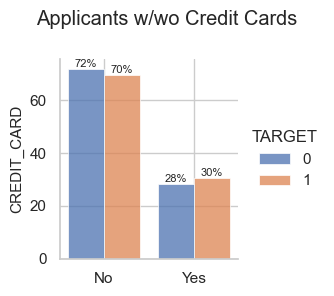

In [50]:
credit_cards = appls_eda.select(["SK_ID_CURR", "TARGET"]).with_columns(
    CREDIT_CARD=pl.when(c.SK_ID_CURR.is_in(credit_card_eda["SK_ID_CURR"]))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
)
_ = plot_utils.plot_bar_cat(
    credit_cards,
    ["CREDIT_CARD"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3.5, 3),
    title="Applicants w/wo Credit Cards",
)
del credit_cards

Some amount and count columns have almost a fifth of values missing.

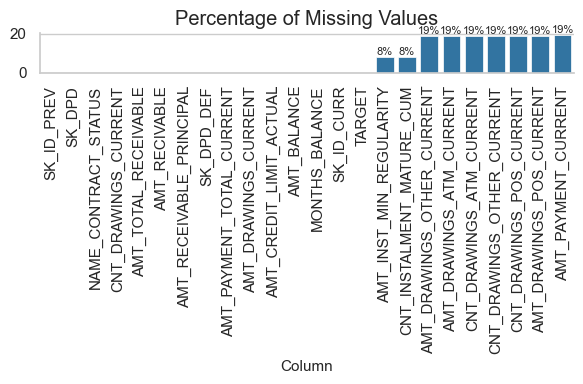

In [51]:
plot_utils.plot_missingness(credit_card_eda)

#### 3.6.2. <a id='toc3_6_2_'></a>Analysis of the Latest Month Balance  [&#8593;](#toc0_)

Analyzing only the latest month balance, amount balance seems as significantly different feature between defaulters and non-defaulters. However most of amount columns are either correlated with amount balance or not related to the target. Again, this can be an issue of absolute values.

Number of instances in balanced data: 12180
Statistically unrelated to target numerical features: ['AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'CNT_DRAWINGS_OTHER_CURRENT', 'SK_DPD', 'SK_DPD_DEF']
Statistically unrelated to target categorical features: []


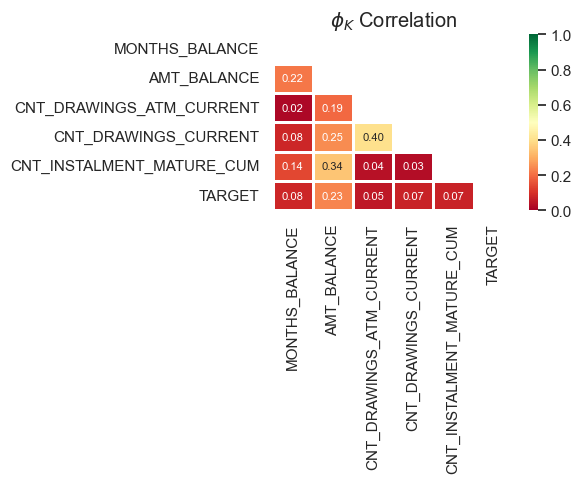

In [52]:
last_status_cc = credit_card_eda.group_by(c.SK_ID_PREV).agg(
    cs.exclude("SK_ID_CURR")
    .filter(c.MONTHS_BALANCE == c.MONTHS_BALANCE.max())
    .first()
)
last_status_cc_balanced = credit_data_utils.get_balanced_pd_df(
    last_status_cc, "TARGET"
)
_, drop_num = statistics_utils.difference_ind_samples_num(
    last_status_cc_balanced, float_cols + int_cols, "TARGET"
)
_, drop_cat = statistics_utils.difference_ind_samples_cat(
    last_status_cc_balanced, cat_cols, "TARGET"
)
drop_multicorr = [
    "AMT_TOTAL_RECEIVABLE",  # related to AMT_BALANCE
    "AMT_RECIVABLE",  # related to AMT_BALANCE
    "AMT_RECEIVABLE_PRINCIPAL",  # related to AMT_BALANCE
    "AMT_INST_MIN_REGULARITY",  # related to AMT_BALANCE
    "AMT_DRAWINGS_ATM_CURRENT",  # related to AMT_DRAWINGS_CURRENT
]
last_status_cc_balanced = last_status_cc_balanced.drop(
    columns=drop_num + drop_cat + drop_multicorr
)
corr_columns = last_status_cc_balanced.drop(columns=["SK_ID_PREV"]).pipe(
    statistics_utils.phik_above,
    target="TARGET",
    num_features=float_cols + int_cols,
)
last_status_cc_balanced[corr_columns].pipe(
    statistics_utils.draw_phik,
    num_features=int_cols + float_cols,
    size=(6, 5),
)
last_status_cc = last_status_cc[corr_columns + ["SK_ID_PREV"]]
_, cat_cols, _, int_cols, float_cols = credit_data_utils.get_column_types(
    last_status_cc.drop(["SK_ID_PREV", "TARGET"])
)
del last_status_cc_balanced

This is the meaning of the 5 selected features from the latest month credit card balance related to the target.

In [53]:
display_pl(
    description.filter(
        c.Table.str.contains("credit_card")
        & c.Row.is_in(last_status_cc.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
155,"""MONTHS_BALANCE""","""Month of balance relative to application date (-1 means the freshest balance date)""","""time only relative to the application"""
156,"""AMT_BALANCE""","""Balance during the month of previous credit""",null
168,"""CNT_DRAWINGS_ATM_CURRENT""","""Number of drawings at ATM during this month on the previous credit""",null
169,"""CNT_DRAWINGS_CURRENT""","""Number of drawings during this month on the previous credit""",null
172,"""CNT_INSTALMENT_MATURE_CUM""","""Number of paid installments on the previous credit""",null


Out of selected features, amount balance of the latest month have higher median for defaulters.

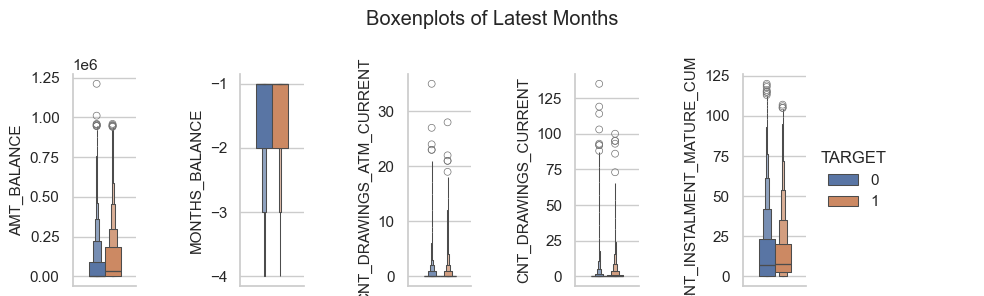

In [54]:
_ = plot_utils.plot_boxen_num(
    last_status_cc,
    float_cols + int_cols,
    "TARGET",
    nrows=1,
    ncols=len(last_status_cc.columns) - 1,
    size=(10, 3),
    title="Boxenplots of Latest Months",
)

In [55]:
del credit_card_eda, last_status_cc

#### 3.6.3. <a id='toc3_6_3_'></a>Summary of Analysis of Balance of Previous Credit Cards from Home Credit  [&#8593;](#toc0_)

1. Approximately a third of current applicants possess credit cards with Home Credit, with a slightly higher frequency among defaulters.
2. The median credit card amount balance for the latest month tends to be higher for defaulters.
3. Amount columns show high correlation among themselves but not necessarily with the target, especially in the latest history month. Some aggregations or transformations may be required to reveal their relationship with the target.

### 3.7. <a id='toc3_7_'></a>Installments on Previous Loans from Home Credit                [&#8593;](#toc0_)

This table contains repayment history for the previously disbursed credits in Home Credit related to the loans in the main table. There is one row for every payment that was made plus one row each for missed payment.

#### 3.7.1. <a id='toc3_7_1_'></a>Data Preparation and Basic Insights  [&#8593;](#toc0_)

After loading the data, initial cleaning, and reduction of memory usage by downcasting data types are performed.

In [56]:
installments_eda = (
    pl.read_csv("./data/installments_payments.csv")
    .filter(c.SK_ID_CURR.is_in(idx_train))
    .pipe(credit_data_utils.initial_pos_cash_credit_card_installments_cleaning)
    .pipe(credit_data_utils.reduce_memory_usage_pl)
    .join(**appls_join)
)
credit_data_utils.display_basic_info(installments_eda)
_, _, _, int_cols, float_cols = credit_data_utils.get_column_types(
    installments_eda.drop(["SK_ID_CURR", "SK_ID_PREV", "TARGET"])
)
print(f"Number of unique loans: {installments_eda['SK_ID_PREV'].n_unique()}")
print(
    "First payed installment:"
    f" {installments_eda['DAYS_ENTRY_PAYMENT'].abs().max()} days ago"
)
installments_eda.describe()

Size before cleaning: 567.50 MB
Size after cleaning: 567.50 MB
Number of columns left: 8
Size before memory reduction: 567.50 MB
Initial data types Counter({Int64: 6, Float64: 2})
Size after memory reduction: 213.50 MB
Final data types Counter({Int16: 4, Int32: 2, Float32: 2})
Number of instances: 9279760
Number of duplicates: 0
Number of unique loans: 682784
First payed installment: 3160 days ago


statistic,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",9.27976e6,9.27976e6,9.27976e6,9.27976e6,9.27976e6,9.277669e6,9.27976e6,9.277669e6,9.27976e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,2091.0,0.0,2091.0,0.0
"""mean""",1.9039e6,278760.791993,0.850642,18.752943,-1041.097266,-1049.908895,16918.626953,17073.728516,0.076791
"""std""",536275.145991,102547.13006,1.002249,26.510644,799.738319,799.337658,50350.878906,54460.832031,0.266259
"""min""",1.000001e6,100002.0,0.0,1.0,-2922.0,-3160.0,0.0,0.0,0.0
"""25%""",1.435005e6,189981.0,0.0,4.0,-1654.0,-1663.0,4200.660156,3375.0,0.0
"""50%""",1.897107e6,279119.0,1.0,8.0,-819.0,-828.0,8793.584961,8100.0,0.0
"""75%""",2.369448e6,367689.0,1.0,19.0,-359.0,-368.0,16535.070312,15903.0,0.0
"""max""",2.843499e6,456255.0,178.0,244.0,-1.0,-1.0,3.7715e6,3.7715e6,1.0


This is the meaning of all the features in the table.

In [57]:
display_pl(
    description.filter(
        c.Table.str.contains("installments")
        & c.Row.is_in(installments_eda.columns)
    ).select(pl.exclude("Table"))
)

,Row,Description,Special
i64,str,str,str
215,"""SK_ID_CURR""","""ID of loan in our sample""","""hashed"""
216,"""NUM_INSTALMENT_VERSION""","""Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed""",null
217,"""NUM_INSTALMENT_NUMBER""","""On which installment we observe payment""",null
218,"""DAYS_INSTALMENT""","""When the installment of previous credit was supposed to be paid (relative to application date of current loan)""","""time only relative to the application"""
219,"""DAYS_ENTRY_PAYMENT""","""When was the installments of previous credit paid actually (relative to application date of current loan)""","""time only relative to the application"""
220,"""AMT_INSTALMENT""","""What was the prescribed installment amount of previous credit on this installment""",null
221,"""AMT_PAYMENT""","""What the client actually paid on previous credit on this installment""",null


Most of the current applicants have installments on loans from Home Credit. Defaulters slightly more often have payed installments.

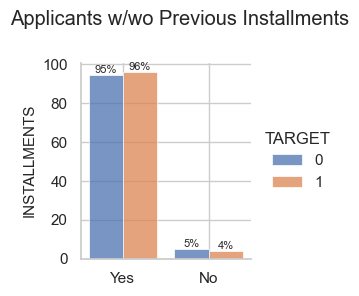

In [58]:
installments = appls_eda.select(["SK_ID_CURR", "TARGET"]).with_columns(
    INSTALLMENTS=pl.when(c.SK_ID_CURR.is_in(installments_eda["SK_ID_CURR"]))
    .then(pl.lit("Yes"))
    .otherwise(pl.lit("No"))
)
_ = plot_utils.plot_bar_cat(
    installments,
    ["INSTALLMENTS"],
    "TARGET",
    nrows=1,
    ncols=1,
    size=(3.5, 3),
    title="Applicants w/wo Previous Installments",
)
del installments

Column related to actual payment have a small percentage of missing values.

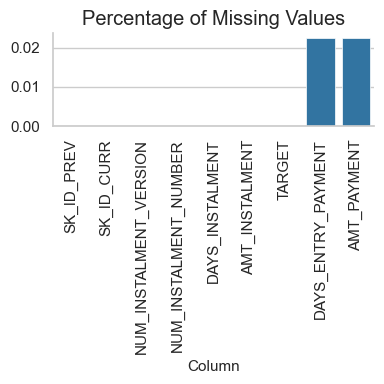

In [59]:
plot_utils.plot_missingness(installments_eda, (4, 4))

#### 3.7.2. <a id='toc3_7_2_'></a>Analysis of the Latest Installments  [&#8593;](#toc0_)

Analyzing latest installments, days since the installment, the maximum number of the installment and whether it is for credit card indicate relation to the target.

Number of instances in balanced data: 103994
Statistically unrelated to target numerical features: []


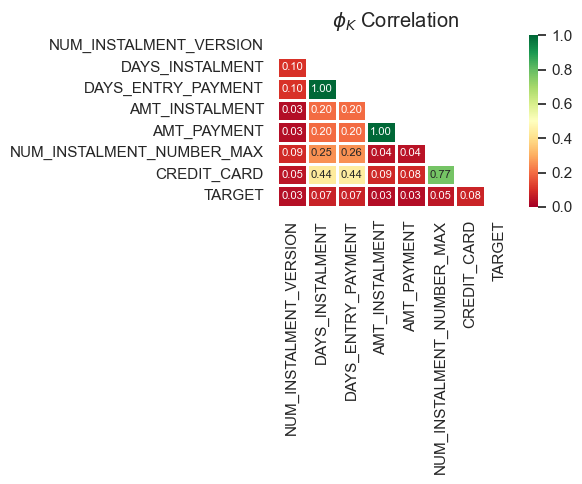

In [60]:
last_installment = installments_eda.group_by(c.SK_ID_PREV).agg(
    cs.exclude("SK_ID_CURR", "NUM_INSTALMENT_NUMBER")
    .filter(c.DAYS_INSTALMENT == c.DAYS_INSTALMENT.max())
    .first(),
    NUM_INSTALMENT_NUMBER_MAX=c.NUM_INSTALMENT_NUMBER.max(),
)
last_installment = last_installment.with_columns(
    CREDIT_CARD=pl.when(c.NUM_INSTALMENT_VERSION == 0)
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
)
_, _, _, int_cols, float_cols = credit_data_utils.get_column_types(
    last_installment.drop(["SK_ID_PREV", "TARGET"])
)
last_installment_balanced = credit_data_utils.get_balanced_pd_df(
    last_installment, "TARGET"
)
_, drop_num = statistics_utils.difference_ind_samples_num(
    last_installment_balanced, float_cols + int_cols, "TARGET"
)
last_installment_balanced.drop(columns=["SK_ID_PREV"]).pipe(
    statistics_utils.draw_phik,
    num_features=int_cols + float_cols,
    size=(6, 5),
)
del last_installment_balanced

Latest installment is more recent for defaulters.

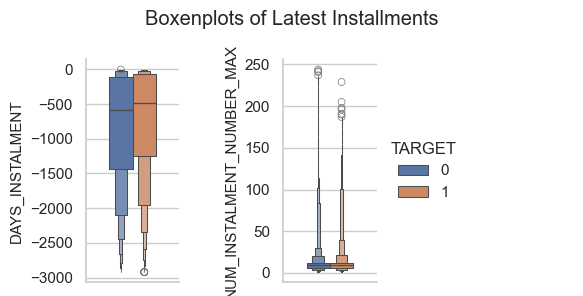

In [61]:
_ = plot_utils.plot_boxen_num(
    last_installment,
    ["DAYS_INSTALMENT", "NUM_INSTALMENT_NUMBER_MAX"],
    "TARGET",
    nrows=1,
    ncols=3,
    size=(6, 3),
    title="Boxenplots of Latest Installments",
)

The median maximum number of the latest installment is higher for non-defaulters if it is to cover a credit card. 

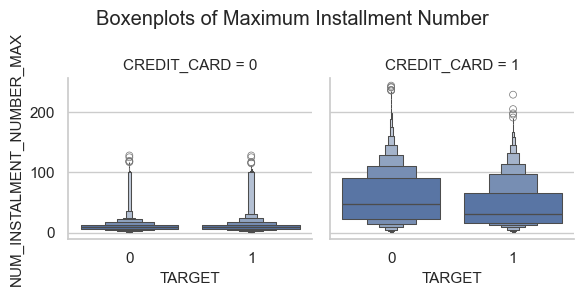

In [62]:
g = sns.FacetGrid(last_installment, col="CREDIT_CARD")
g.map(
    sns.boxenplot,
    "TARGET",
    "NUM_INSTALMENT_NUMBER_MAX",
    order=[0, 1],
)
plt.suptitle("Boxenplots of Maximum Installment Number")
plt.show()

In [63]:
del last_installment, installments_eda

#### 3.7.3. <a id='toc3_7_3_'></a>Summary of Analysis of Installments on Previous Loans from Home Credit  [&#8593;](#toc0_)

1. A majority of current applicants have installments on loans from Home Credit.
2. The latest installment tends to be more recent for defaulters.
3. If it is to cover a credit card, the maximum number of the latest installment is higher for non-defaulters.

### 3.8. <a id='toc3_8_'></a>Insights from Exploratory Data Analysis  [&#8593;](#toc0_)

1. The dataset from Home Credit is heavily imbalanced with defaulters constituting 8.07%.
2. There is varying proportion of missing values in certain columns throughout all tables, which need to be taken care of or imputed.
3. Some columns may indicate outlier instances, which could be considered for removal, but also may be kept to reflect the true distribution of the data.
4. There are some cases there missing values in day columns are encoded as 365243, and missing values are encoded as XNA in categorical columns. These should be adequately be taken care of. Also, XAP means non-applicable in this dataset.
5. A big proportion of columns do not show significant or show only very weak correlation with target. However, their importance might be boosted by some transformations, aggregations and feature engineering in general.
6. Static columns from the main Home Credit applications table significantly related to the target variable: external sources, apartment size, age, gender, employment history length, days passed since registration, ID publication, and last phone change, number of defaulters in social surroundings, occupation type and organization, income type, education level, marital status, housing type, providing work or personal phone, matching registration, contact and work regions, providing certain document, loan type, living region. However, transformations of columns related to amounts might also show some relationship to target.
7. More than 80% of applicants had loans from other institutions, but defaulters tended to have these loans less often. Columns about active credits, type and recency of those credits may provide information about probability of default. Amount and count features on loans from other institutions are not related to the target in absolute values.
8. Historical balance information on loans from other institutions is related to the target, and features engineered using this data might help in predicting default.
9. Most of the current applicants have already applied for Home Credit loan before, but the proportion is slightly lower for defaulters. Columns in the previous applications table significantly related to the target variable: down payment, decision days, payment count, status, yield group, product type, seller domain, channel type, application time.
10. Most of the current applicants have POS or cash loans from Home Credit they payed or pay installments for. Columns describing balance of these loans are not directly related to target and some aggregations and transformations are needed to uncover their potential.
11. Only around a third of current applicants have credit cards with Home Credit. Slightly more often they are defaulters. Credit card amount balance of the latest month is related to target. Amount columns describing balance of credit cards are highly correlated between each other but not with the target, at least in the latest history month. Some aggregations or transformations might be needed to uncover their relation to the target.
12. Most of the current applicants have installments on loans from Home Credit. The recency of the latest installment is related to the target as well as the maximum number of the latest installment if it is to cover a credit card. However, transformations and aggregations of columns describing installments might be needed to uncover the relation to target.
13. Though there are features directly related to target in Home Credit dataset, smart feature engineering is needed to reach the full potential of this dataset in developing an ML for default prediction.